# EDA & Machine Learning (PCA)

## Setup

Establish connection to the Postgre-SQL database, where the data is stored. We are connecting to the Data Lake and not the Data Warehouse.

In [ ]:
# Importing the required libraries
import psycopg2
import psycopg2.extras as extras
import sys
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
## Connection to the postgre-sql database

def open_connection():
  
  ENDPOINT = "mightymufflonmovies.cmz4lzmucin2.us-east-1.rds.amazonaws.com"
  USERNAME = "lukas"
  PASSWORD = "lukas1234"
  DB_NAME = "mightymufflonmovies"

  conn = None
  try:
    # connect to the PostgreSQL server
    print('Connecting to the PostgreSQL database...')
    conn = psycopg2.connect("host={} dbname={} user={} password={}".format(ENDPOINT, DB_NAME, USERNAME, PASSWORD))
  except (Exception, psycopg2.DatabaseError) as error:
    print(error)
    sys.exit(1)
  print("Connection successful")

  cursor = conn.cursor(cursor_factory=psycopg2.extras.RealDictCursor) 
  return cursor, conn

In [ ]:
def close_connection(conn):
  conn.close()
  print("Connection closed")

## Loading the Data

In [ ]:
## SELECT TEST QUERY

select_query1 = """ 
  SELECT * 
  FROM games
  ORDER BY title 
  LIMIT 1; 
"""
cursor, conn = open_connection()

cursor.execute(select_query1)
for row in cursor:
    pprint(dict(row))

close_connection(conn)

Connecting to the PostgreSQL database...
Connection successful
{'action': False,
 'action_and_adventure': False,
 'adventure': True,
 'average_playtime_2weeks': None,
 'average_playtime_forever': None,
 'boxleiter_number': 50,
 'ccu': None,
 'current_price': None,
 'detailed_description': None,
 'developed_games_id': 1132,
 'developer1': 'Anatoliy Loginovskikh',
 'developer2': 'Аlexandr Telminov',
 'developer3': None,
 'discount': None,
 'dlc_steam_app_id': None,
 'genre1': 'Adventure',
 'genre2': 'Casual',
 'genre3': 'Indie',
 'has_another_developer': True,
 'has_dlc': None,
 'has_publisher': True,
 'has_same_genre_id': 698,
 'initial_price': None,
 'is_free': None,
 'languages': None,
 'median_playtime_2weeks': None,
 'median_playtime_forever': None,
 'metacritic_score': None,
 'owners_estimation_gameachievements': None,
 'owners_estimation_steamspy': None,
 'pc_requirements_minimum': None,
 'positivity': 94.0,
 'publisher1': 'Anatoliy Loginovskikh',
 'publisher2': None,
 'publisher3

In [ ]:
close_connection(conn)

Connection closed


In [ ]:
## Now as Dataframe

select_query = """ 
  select 	g.title, g.genre1, g.genre2, g.developer1,
		g.total_ratings, g.positivity, g.revenue_gamestats, g.revenue_boxleiter,
		g."action", g.adventure, g.action_and_adventure, g.has_another_developer,
		g.has_publisher, g.owners_estimation_steamspy, g.owners_estimation_gameachievements,
		g.revenue_gameachievements, g.average_playtime_forever, g.average_playtime_2weeks, 
		g.median_playtime_forever, g.current_price, g.initial_price, g.is_free,
		g.metacritic_score, g.total_nr_recommendations, g.release_date,
		g.tag1, g.tag2, g.tag3, g.has_dlc, m.movie_and_series_vote_average,
		m.movie_and_series_vote_count, m.movie_and_series_popularity, m.has_successful_movie_or_serie,
		dg.developer_name
from games as g
left join has_same_genre as m on g.has_same_genre_id = m.has_same_genre_id
left join developed_games as dg on g.developed_games_id = dg.developed_games_id;
"""
cursor, conn = open_connection()
df = pd.read_sql_query(select_query, conn)
close_connection(conn)

df.head(5)

Connecting to the PostgreSQL database...
Connection successful
Connection closed


,title,genre1,genre2,developer1,total_ratings,positivity,revenue_gamestats,revenue_boxleiter,action,adventure,...,release_date,tag1,tag2,tag3,has_dlc,movie_and_series_vote_average,movie_and_series_vote_count,movie_and_series_popularity,has_successful_movie_or_serie,developer_name
0,Dungeon Defenders: City in the Cliffs Mission ...,Strategy,RPG,Trendy Entertainment,NaN,NaN,NaN,NaN,False,False,...,None,None,None,None,None,NaN,NaN,NaN,None,Trendy Entertainment
1,OverDrift Festival - Premium Cars Pack#3,Massively Multiplayer,Racing,OverDrift Crew,NaN,NaN,NaN,NaN,False,False,...,None,None,None,None,None,NaN,NaN,NaN,None,OverDrift Crew
2,Marvel’s Spider-Man: Miles Morales,Action,Adventure,Insomniac Games,NaN,NaN,NaN,NaN,False,False,...,None,None,None,None,None,NaN,NaN,NaN,False,Insomniac Games
3,LET IT DIE,Action,Action,GRASSHOPPER MANUFACTURE SUPERTRICK GAMES,NaN,NaN,NaN,NaN,True,False,...,2018-09-01,Single-player,Steam Achievements,Captions available,True,6.458334,25542.0,306.47,False,GRASSHOPPER MANUFACTURE SUPERTRICK GAMES
4,Beat Saber: Lady Gaga - 'Poker Face',Indie,NaN,None,NaN,NaN,NaN,NaN,False,False,...,None,None,None,None,None,NaN,NaN,NaN,None,None


In [ ]:
df.shape

(2833, 34)

In [ ]:
df.dtypes

title                                  object
genre1                                 object
genre2                                 object
developer1                             object
total_ratings                         float64
positivity                            float64
revenue_gamestats                     float64
revenue_boxleiter                     float64
action                                   bool
adventure                                bool
action_and_adventure                     bool
has_another_developer                    bool
has_publisher                            bool
owners_estimation_steamspy             object
owners_estimation_gameachievements    float64
revenue_gameachievements              float64
average_playtime_forever              float64
average_playtime_2weeks               float64
median_playtime_forever               float64
current_price                         float64
initial_price                         float64
is_free                           

## General EDA

In [ ]:
df.select_dtypes(include='number')

,total_ratings,positivity,revenue_gamestats,revenue_boxleiter,owners_estimation_gameachievements,revenue_gameachievements,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,current_price,initial_price,metacritic_score,total_nr_recommendations,movie_and_series_vote_average,movie_and_series_vote_count,movie_and_series_popularity
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1919.0,2300.0,131.0,0.00,0.00,NaN,NaN,6.458334,25542.0,306.47
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2828,118.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2829,55.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830,16.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2831,21.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


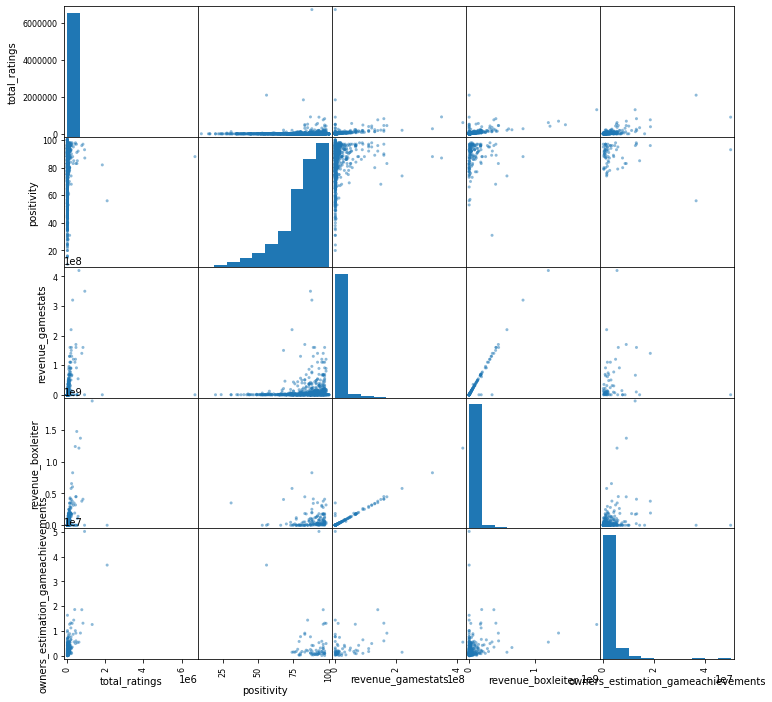

In [ ]:
column = [0,1,2,3,4]
pd.plotting.scatter_matrix(
    df.select_dtypes(include='number').iloc[:,column],
    figsize=(12,12)
);

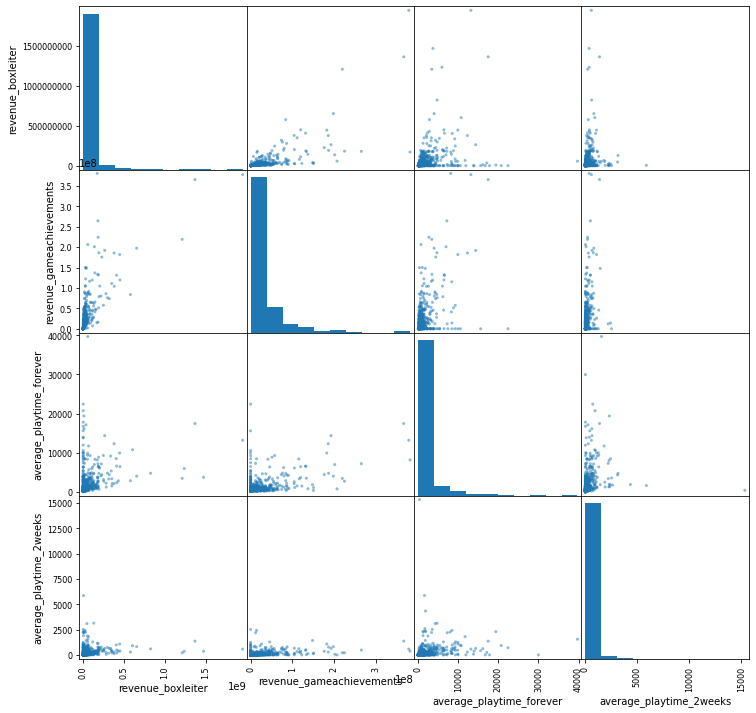

In [ ]:
column = [3,5,6,7]
pd.plotting.scatter_matrix(
    df.select_dtypes(include='number').iloc[:,column],
    figsize=(12,12)
);

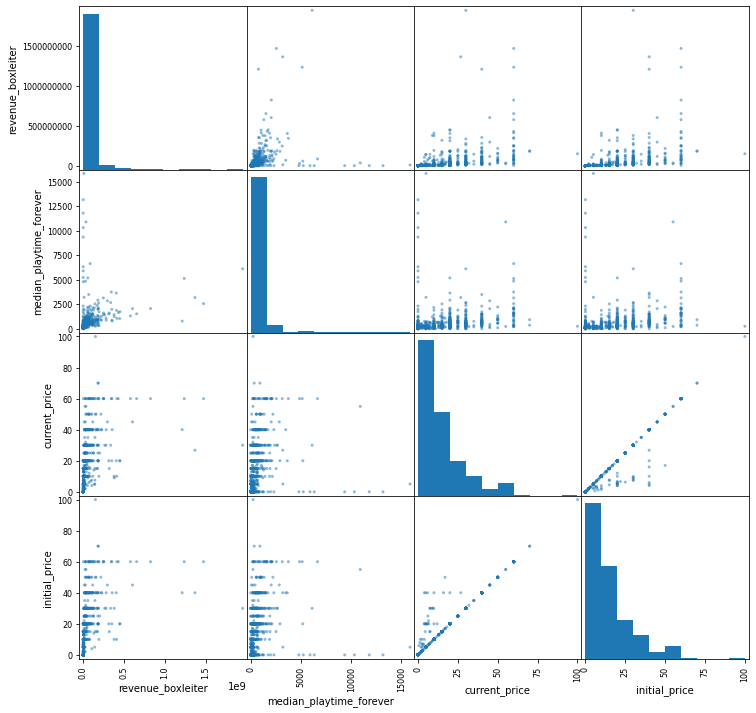

In [ ]:
column = [3,8,9,10]
pd.plotting.scatter_matrix(
    df.select_dtypes(include='number').iloc[:,column],
    figsize=(12,12)
);

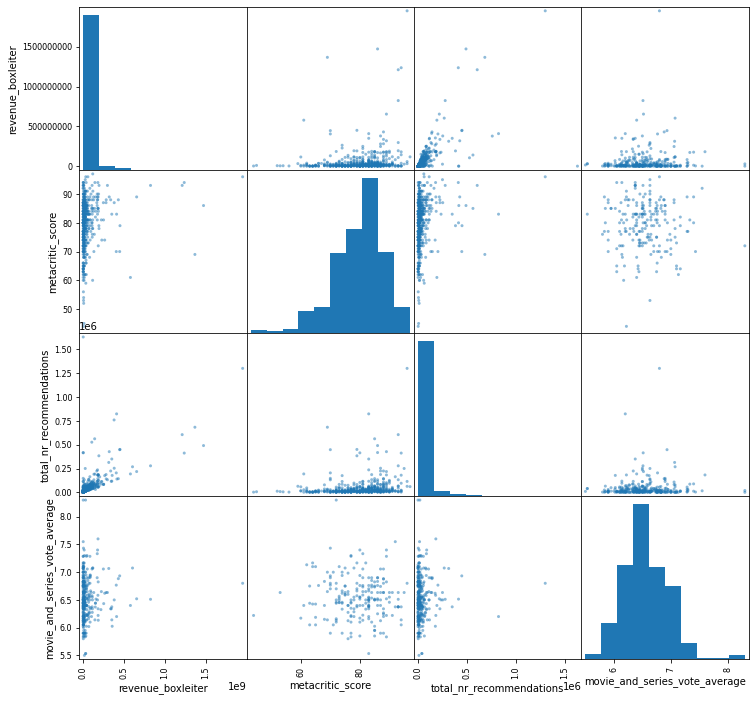

In [ ]:
column = [3,11,12,13]
pd.plotting.scatter_matrix(
    df.select_dtypes(include='number').iloc[:,column],
    figsize=(12,12)
);

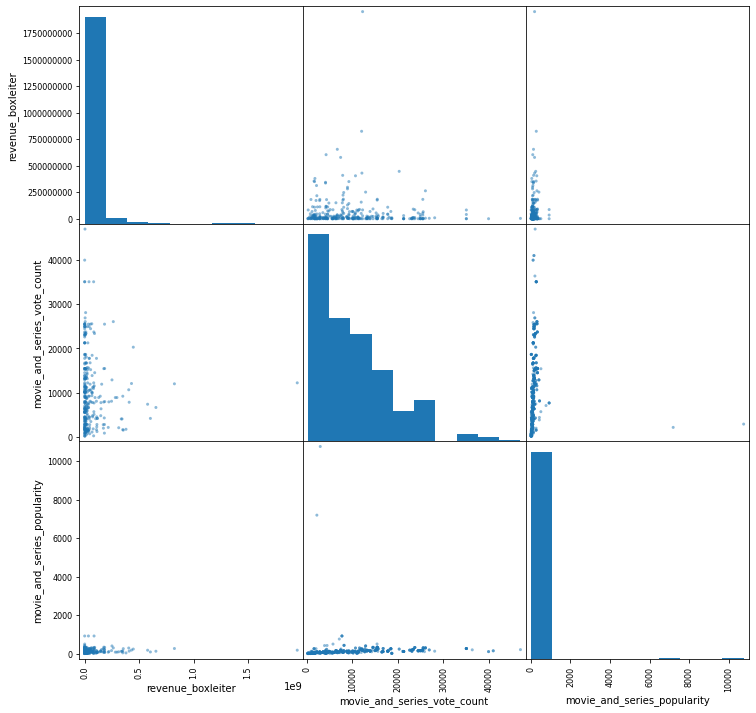

In [ ]:
column = [3,14,15]
pd.plotting.scatter_matrix(
    df.select_dtypes(include='number').iloc[:,column],
    figsize=(12,12)
);

## Research Question 1: Is the steam revenue influenced by the genre of games? (games: genre vs revenue)

For the first research question, we want to investigate whether the steam revenue, represented by the boxleitner revenue is influenced by the genre of the game. Therefore we have to filter the dataframe for games, which actually have a value for the boxleitner-revenue.

In [ ]:
df_genre = df[df.revenue_boxleiter.notnull()]
df_genre.shape

(738, 34)

In [ ]:
df_genre.head(5)

,title,genre1,genre2,developer1,total_ratings,positivity,revenue_gamestats,revenue_boxleiter,action,adventure,...,release_date,tag1,tag2,tag3,has_dlc,movie_and_series_vote_average,movie_and_series_vote_count,movie_and_series_popularity,has_successful_movie_or_serie,developer_name
24,Grim Dawn,Action,Action,Crate Entertainment,65228.0,93.0,31000000.0,81502384.0,True,False,...,2016-02-01,Для одного игрока,Для нескольких игроков,Кооперативная игра,True,6.50,10953.0,32.801,False,Crate Entertainment
54,Kathy Rain,Adventure,Adventure,Clifftop Games,1585.0,NaN,NaN,1187957.5,False,True,...,2016-05-01,Single-player,Steam Achievements,Steam Trading Cards,False,NaN,NaN,NaN,False,Clifftop Games
55,Back 4 Blood,Action,Action,Turtle Rock Studios,30907.0,NaN,NaN,92705550.0,True,False,...,2021-10-01,Single-player,Multi-player,PvP,True,NaN,NaN,NaN,False,Turtle Rock Studios
56,ENDLESS Space - Definitive Edition,Strategy,Strategy,AMPLITUDE Studios,6366.0,NaN,NaN,3179817.0,False,False,...,2012-07-01,Single-player,Multi-player,PvP,True,NaN,NaN,NaN,None,AMPLITUDE Studios
57,Knockout City,Action,Action,Velan Studios,4914.0,NaN,NaN,0.0,True,False,...,2021-05-01,Multi-player,PvP,Online PvP,True,6.55,4559.0,76.222,True,Velan Studios


In [ ]:
df_genre = df_genre[["genre1", "revenue_boxleiter"]]

In [ ]:
df_genre.astype({'revenue_boxleiter': 'int32'}).dtypes

genre1               object
revenue_boxleiter     int32
dtype: object

In [ ]:
df_genre.shape

(738, 2)

### Amout of Games per Genre

We are left with 738 observations. Initally the dataframe consisted of 2'833 observations. This means for most of the games, we actually don't have the information about the revenue. However, we continue investigating the remaing observations. We can see, that the amount of observations based on the genre of the game is not equally distributed. Most of the games in our dataset are games from the action genre.

In [ ]:
amount_genre = df_genre["genre1"].value_counts()
amount_genre

Action                   490
Adventure                 60
Indie                     36
Strategy                  34
Simulation                30
RPG                       24
Casual                    22
Free to Play              20
Racing                    11
Massively Multiplayer      3
Sports                     2
Animation & Modeling       2
NaN                        1
Gore                       1
Utilities                  1
Audio Production           1
Name: genre1, dtype: int64

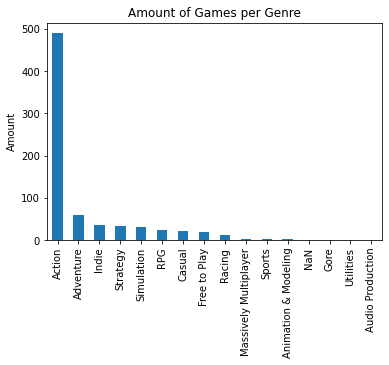

In [ ]:
amount_genre.plot(kind = "bar")
plt.title("Amount of Games per Genre")
plt.ylabel("Amount")
plt.show();

### Sum of Revenue per Genre

Also when computing the sum of the boxleitner revenue per genre it can clearly be stated that the action-genre has the highest value.

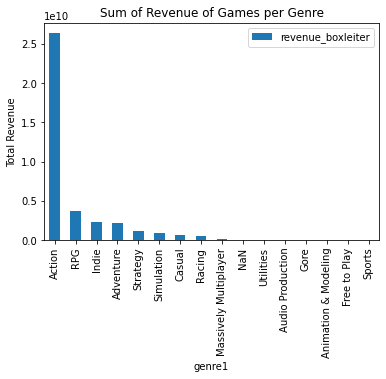

In [ ]:
sum_genre = df_genre.groupby("genre1").sum().sort_values(by = "revenue_boxleiter", ascending = False)
sum_genre.plot(kind = "bar")
plt.title("Sum of Revenue of Games per Genre")
plt.ylabel("Total Revenue")
plt.show()

From the below plot it can be seen that most of the observations are in the genre of action. Also the revenue seems to be the highest in this genre, at least for one game.

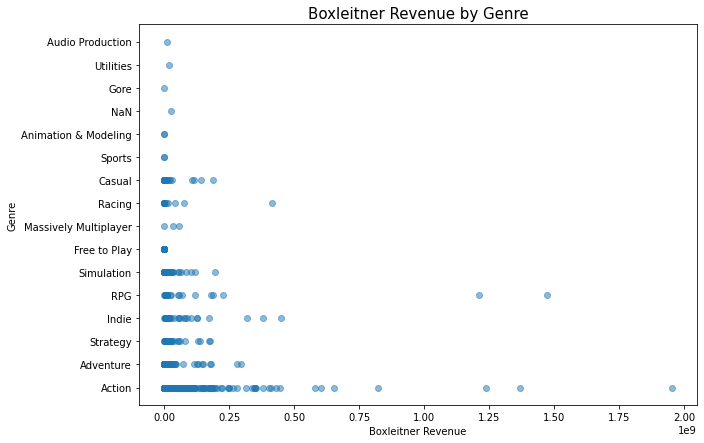

In [ ]:
# Define the values / variables
revenue = df_genre["revenue_boxleiter"].values.tolist()
genre = df_genre["genre1"].values.tolist()

# Define the plot
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize=(10,7))

# Scatterplot Genre by Revenue
ax1.scatter(revenue,
            genre,
            alpha=0.5)
ax1.set_title("Boxleitner Revenue by Genre",
              size = 15)
ax1.set_xlabel("Boxleitner Revenue")
ax1.set_ylabel("Genre")
plt.show();

Since the clear winner regarding the total amount of revenue per genre is action, it seems rather unclear whether there is a difference in the other genres. Therefore, we take out the genre Action and see whether we can visually detect differences in terms of revenue in the other genres.

### Median / Mean of Revenue per Genre

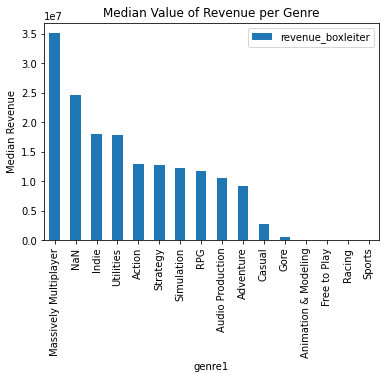

In [ ]:
# Create plot for the median revenue per genre
median_genre = df_genre.groupby("genre1").median().sort_values(by = "revenue_boxleiter", ascending = False)
median_genre.plot(kind = "bar")
plt.title("Median Value of Revenue per Genre")
plt.ylabel("Median Revenue")
plt.show()

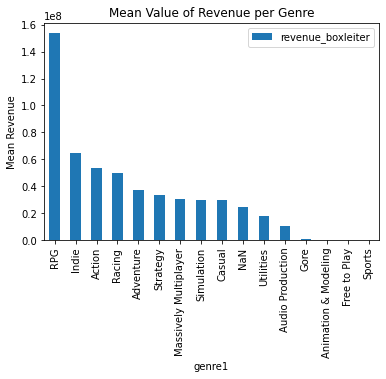

In [ ]:
# Create plot for the mean revenue per genre
mean_genre = df_genre.groupby("genre1").mean().sort_values(by = "revenue_boxleiter", ascending = False)
mean_genre.plot(kind = "bar")
plt.title("Mean Value of Revenue per Genre")
plt.ylabel("Mean Revenue")
plt.show()

In [ ]:
# Filter out genres which are not of interest or have no revenue --> Some genres are actually not considered to be one such as "Utilities"
df_filter = df_genre[(df_genre["genre1"] != "RPG") &
                 (df_genre["genre1"] != "Massively Multiplayer") &
                 (df_genre["genre1"] != "Animation & Modeling") &
                 (df_genre["genre1"] != "Free to Play") &
                 (df_genre["genre1"] != "NaN") &
                 (df_genre["genre1"] != "Utilities")]

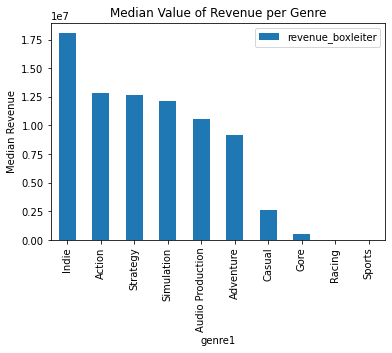

In [ ]:
# Create plot for the median revenue per genre
median_genre_without_action = df_filter.groupby("genre1").median().sort_values(by = "revenue_boxleiter", ascending = False)
median_genre_without_action.plot(kind = "bar")
plt.title("Median Value of Revenue per Genre")
plt.ylabel("Median Revenue")
plt.show()

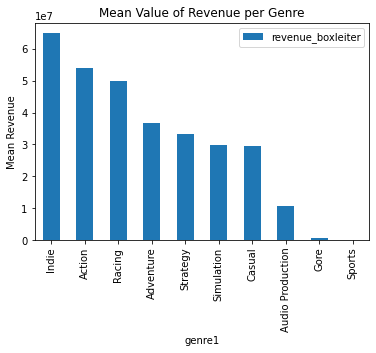

In [ ]:
# Create plot for the median revenue per genre
mean_genre_without_action = df_filter.groupby("genre1").mean().sort_values(by = "revenue_boxleiter", ascending = False)
mean_genre_without_action.plot(kind = "bar")
plt.title("Mean Value of Revenue per Genre")
plt.ylabel("Mean Revenue")
plt.show()

When comparing the mean and median value for the revenue per genre, we obtain slightly different results. While the median is more robust to outliers, Indie games are ranked as second most profitable genre followed by Action and Strategy. When looking at the mean value also Indie is ranked highest, Action and Racing are ranked second and third respectively.

## Research Question 2: Is the steam revenue influenced by the release year? (games: genre vs release_year)

### Development of Revenue over Time

Now we want to investigate whether the release date of the different games in our dateset has an influence on the revenue. We assume that newly released games have a higher revenue, since the gaming market has become more popular in the last years.

In [ ]:
# Subset the dataframe to the columns / variables needed
df_time = df[["genre1", "revenue_boxleiter", "release_date"]]
df_time.head(5)

,genre1,revenue_boxleiter,release_date
0,Strategy,NaN,None
1,Massively Multiplayer,NaN,None
2,Action,NaN,None
3,Action,NaN,2018-09-01
4,Indie,NaN,None


In [ ]:
# Check the shape and drop the NA-Values
df_time = df_time.dropna()
# Only filter for revenue which are higher than 0 --> exclude zeros
df_time = df_time[df_time["revenue_boxleiter"] > 0]
print(df_time.shape)
print(80*"*")
print(df_time.head(5))

(555, 3)
********************************************************************************
       genre1  revenue_boxleiter release_date
24     Action         81502384.0   2016-02-01
54  Adventure          1187957.5   2016-05-01
55     Action         92705550.0   2021-10-01
56   Strategy          3179817.0   2012-07-01
58     Action        103550200.0   2017-05-01


In [ ]:
# Check the datatypes
df_time.dtypes

genre1                object
revenue_boxleiter    float64
release_date          object
dtype: object

In [ ]:
# Convert the release-dates to date-objects
df_time['release_date'] = pd.to_datetime(df_time['release_date'])

In [ ]:
df_time.dtypes

genre1                       object
revenue_boxleiter           float64
release_date         datetime64[ns]
dtype: object

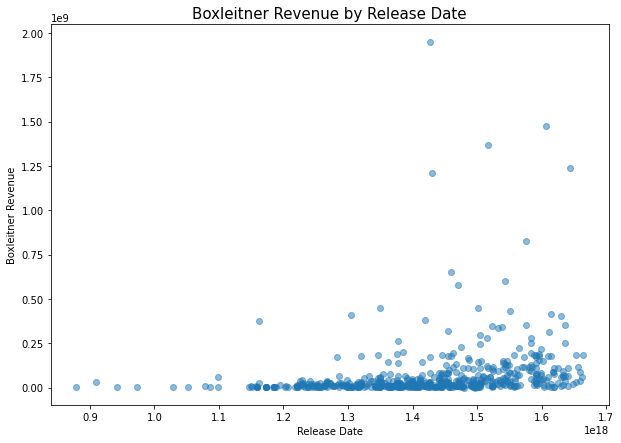

In [ ]:
# Define the values / variables
revenue = df_time["revenue_boxleiter"].values.tolist()
time = df_time["release_date"].values.tolist()

# Define the plot
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize=(10,7))

# Scatterplot Release-date by Revenue
ax1.scatter(time,
            revenue,
            alpha=0.5)
ax1.set_title("Boxleitner Revenue by Release Date",
              size = 15)
ax1.set_xlabel("Release Date")
ax1.set_ylabel("Boxleitner Revenue")
plt.show();

From the scatterplot above it can be seen that newly released games seem to achieve a higher revenue. However, this might be influenced by our assumptions since the gaming market in general was becoming more and more popular in the last couple of years. This is therefore a general trend which manifest itself by time.

In [ ]:
df_time.head(5)

,genre1,revenue_boxleiter,release_date
24,Action,81502384.0,2016-02-01
54,Adventure,1187957.5,2016-05-01
55,Action,92705550.0,2021-10-01
56,Strategy,3179817.0,2012-07-01
58,Action,103550200.0,2017-05-01


In [ ]:
# Sort revenue values from highest to lowest to remove highest values
revenue_values = [value for value in df_time["revenue_boxleiter"]]
revenue_values.sort(reverse = True)
print(revenue_values)

[1951140400.0, 1472433700.0, 1366916200.0, 1236309900.0, 1211141200.0, 823788700.0, 653888000.0, 603297900.0, 577679700.0, 449971900.0, 446260740.0, 429855360.0, 412431260.0, 408499580.0, 404394900.0, 379318020.0, 377729900.0, 354413400.0, 349891680.0, 349614100.0, 343064830.0, 335934460.0, 318529980.0, 312476670.0, 296189440.0, 281325660.0, 279308860.0, 262850350.0, 250665230.0, 248607570.0, 246636900.0, 227483120.0, 221988500.0, 216549200.0, 201703040.0, 193713710.0, 193375650.0, 191512780.0, 188280000.0, 185859020.0, 183975710.0, 183383440.0, 182286820.0, 181659040.0, 181140380.0, 180989650.0, 179902000.0, 179686110.0, 178920900.0, 177258460.0, 175646080.0, 175165630.0, 173732560.0, 171875020.0, 171268380.0, 170535140.0, 166480430.0, 156592850.0, 156216260.0, 151826030.0, 150107470.0, 149345060.0, 147635390.0, 143702190.0, 143593700.0, 142954830.0, 140001680.0, 138951260.0, 135946340.0, 130984176.0, 130588670.0, 128921016.0, 126515624.0, 126228240.0, 125637104.0, 118903184.0, 118207

In [ ]:
# Filter out the highest values to get a better overview of the distribution over time
df_time = df_time[df_time["revenue_boxleiter"] < 823788700.0]

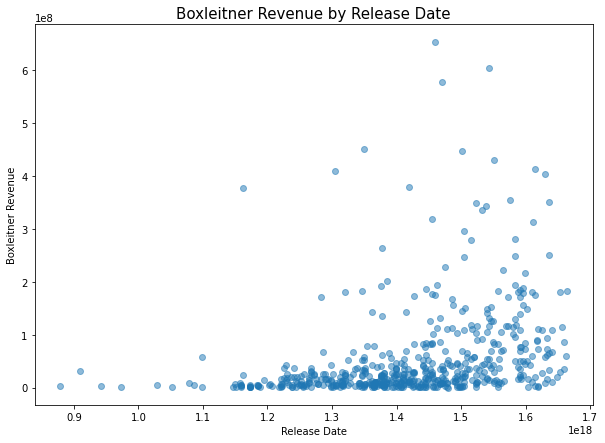

In [ ]:
# Define the values / variables
revenue = df_time["revenue_boxleiter"].values.tolist()
time = df_time["release_date"].values.tolist()

# Define the plot
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize=(10,7))

# Scatterplot Release-date by Revenue
ax1.scatter(time,
            revenue,
            alpha=0.5)
ax1.set_title("Boxleitner Revenue by Release Date",
              size = 15)
ax1.set_xlabel("Release Date")
ax1.set_ylabel("Boxleitner Revenue")
plt.show();

From the above scatterplot we can see the increasing trend over time even better. We can therefore state the the release-date has an influence on the expected revenue, since we assume that the gaming market was trending on the last years. But we also want to investigate, whether there is a visual difference between the genres.

### Development of Revenue by Genre over Time

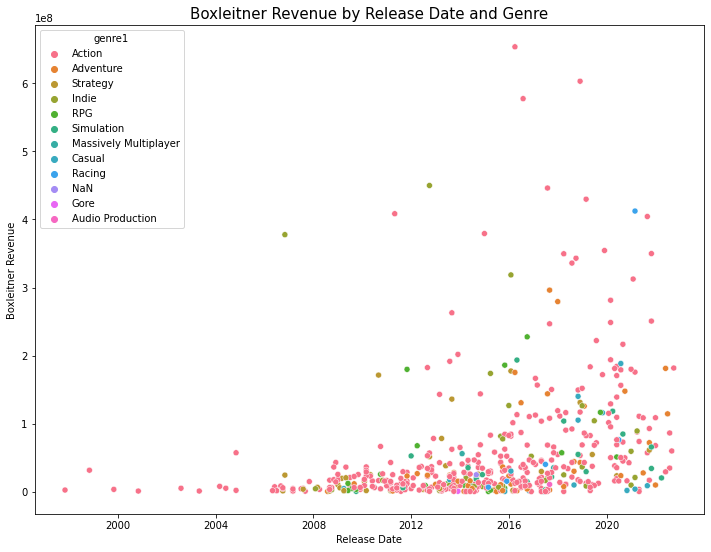

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Define the plot
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize=(12,9))

# Specify the axis and title
ax1 = sns.scatterplot('release_date', 'revenue_boxleiter', data=df_time, hue= df_time['genre1'])
ax1.set_title("Boxleitner Revenue by Release Date and Genre",
              size = 15)
ax1.set_xlabel("Release Date")
ax1.set_ylabel("Boxleitner Revenue")
plt.show();

The plot doesn't provide any valuable insight, since most of the observations in the dataset are action movies. But following the first research question, we are trying to make another plot showing the genres "Indie", "Adventure" and "Strategy" on the same plot, since these are the three genres next to "Action" which hold the most observations.

### Development of Indie, Adventure and Strategy Games Revenue over Time

In [ ]:
# Define the subset with the or-condition
scatter_genres_subset = df_time[(df_time["genre1"] == "Indie") |
                                (df_time["genre1"] == "Adventure") |
                                (df_time["genre1"] == "Strategy")]

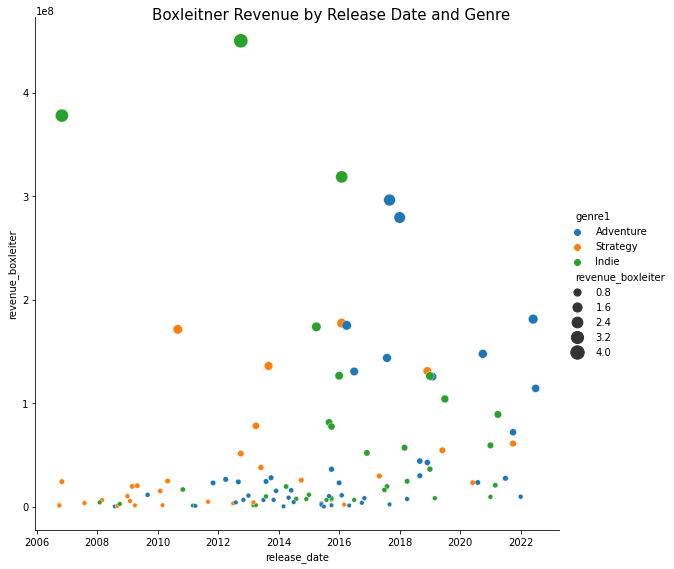

In [ ]:
# Scatterplot from Seaborn - Definition of variables and graphic
ax1 = sns.relplot(x = "release_date", 
                  y = "revenue_boxleiter",
                  data = scatter_genres_subset, 
                  hue= scatter_genres_subset['genre1'],
                  size = scatter_genres_subset["revenue_boxleiter"],
                  sizes = (20, 200),
                  height = 8)
ax1.fig.suptitle("Boxleitner Revenue by Release Date and Genre",
                 size = 15)
plt.show();

## Research Question 3: Is the steam revenue influenced when a film in the same genre was released at the same time?

#### Visual Comparison

Now we want to investigate, whether the revenue is different where the release date of a game was the same as with a successful movie. To do this we compare the mean, median and standard deviation of the two categories represented by a boolean value (True or False) for a successful movie or series released at the same time as the game was released.

In [ ]:
# Subset the dataframe
df_correlation = df[["genre1",
                     "revenue_boxleiter",
                     "total_ratings",
                     "positivity",
                     "movie_and_series_vote_average",
                     "movie_and_series_vote_count",
                     "has_successful_movie_or_serie"]]

In [ ]:
# Check the shape of the dataframe
df_correlation.shape

(2833, 7)

In [ ]:
# Drop the missing values for the revenue-column
df_correlation = df_correlation.dropna(subset = ["revenue_boxleiter"])
print(df_correlation.shape)
print(80*"*")
print(df_correlation.head(5))

(738, 7)
********************************************************************************
       genre1  revenue_boxleiter  total_ratings  positivity  \
24     Action         81502384.0        65228.0        93.0   
54  Adventure          1187957.5         1585.0         NaN   
55     Action         92705550.0        30907.0         NaN   
56   Strategy          3179817.0         6366.0         NaN   
57     Action                0.0         4914.0         NaN   

    movie_and_series_vote_average  movie_and_series_vote_count  \
24                           6.50                      10953.0   
54                            NaN                          NaN   
55                            NaN                          NaN   
56                            NaN                          NaN   
57                           6.55                       4559.0   

   has_successful_movie_or_serie  
24                         False  
54                         False  
55                         Fa

In [ ]:
# In order to identify a relationship between revenue and successful movie
# also the missing values within the column "has_successful_movie_or_serie"
# has to be removed
df_correlation = df_correlation.dropna(subset = ["has_successful_movie_or_serie"])
df_correlation.head(5)

,genre1,revenue_boxleiter,total_ratings,positivity,movie_and_series_vote_average,movie_and_series_vote_count,has_successful_movie_or_serie
24,Action,81502384.0,65228.0,93.0,6.50,10953.0,False
54,Adventure,1187957.5,1585.0,NaN,NaN,NaN,False
55,Action,92705550.0,30907.0,NaN,NaN,NaN,False
57,Action,0.0,4914.0,NaN,6.55,4559.0,True
58,Action,103550200.0,103602.0,NaN,NaN,NaN,False


In [ ]:
# Check how much observations we have for each category
df_correlation["has_successful_movie_or_serie"].value_counts() 

False    404
True     146
Name: has_successful_movie_or_serie, dtype: int64

In [ ]:
# Check the standard deviation for the two categories
std_success = df_correlation.groupby("has_successful_movie_or_serie")["revenue_boxleiter"].std()
std_success

has_successful_movie_or_serie
False    1.229564e+08
True     1.843949e+08
Name: revenue_boxleiter, dtype: float64

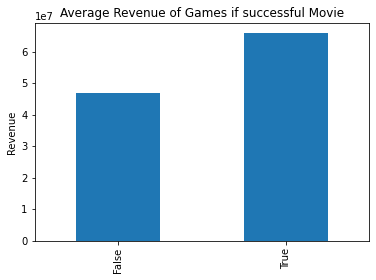

Average Revenue if game had no successful movie released on same date:  47016274 US-Dollar($)
Average Revenue if game had successful movie released on same date:  65766230 US-Dollar($)
Games with successful movies have on average: 18749956 US-Dollar($) more revenue


In [ ]:
# Now we check the mean for each category and plot the result
mean_success = df_correlation.groupby("has_successful_movie_or_serie")["revenue_boxleiter"].mean()
mean_success.plot(kind = "bar")
plt.title("Average Revenue of Games if successful Movie")
plt.xlabel("")
plt.ylabel("Revenue")
plt.show();
print("Average Revenue if game had no successful movie released on same date: ", round(mean_success[0]), "US-Dollar($)")
print("Average Revenue if game had successful movie released on same date: ", round(mean_success[1]), "US-Dollar($)")
print("Games with successful movies have on average:", round(mean_success[1] - mean_success[0]), "US-Dollar($) more revenue")

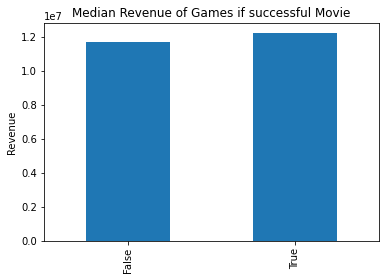

Median Revenue if game had no successful movie released on same date:  11701020 US-Dollar($)
Median Revenue if game had successful movie released on same date:  12189930 US-Dollar($)
Games with successful movies have: 488911 US-Dollar($) more revenue, when comparing the median-value


In [ ]:
# Now we check the median for each category and plot the result
median_success = df_correlation.groupby("has_successful_movie_or_serie")["revenue_boxleiter"].median()
median_success.plot(kind = "bar")
plt.title("Median Revenue of Games if successful Movie")
plt.xlabel("")
plt.ylabel("Revenue")
plt.show();
print("Median Revenue if game had no successful movie released on same date: ", round(median_success[0]), "US-Dollar($)")
print("Median Revenue if game had successful movie released on same date: ", round(median_success[1]), "US-Dollar($)")
print("Games with successful movies have:", round(median_success[1] - median_success[0]), "US-Dollar($) more revenue, when comparing the median-value")

When comparing the mean and median value for the two categories, it can be seen that the mean value is higher for games which had a movie or series released at the same time compared to those games which had not. The median value on the other side shows a same result but with less deviation between the two groups.

#### T-Test / Anova for Comparison

What we want to investigate is whether there is a different between the two groups. In order to do this, we need to formulate a hypothesis and compute whether the two average-values are statistically significant different from each other.

**H0**: The release of a successful movie has no influence on the revenue of a game. <br>
**H1**: The release of a successful movie has influence on the revenue of a game.

##### Assumption 1: Normal Distribution

**Visual Check**

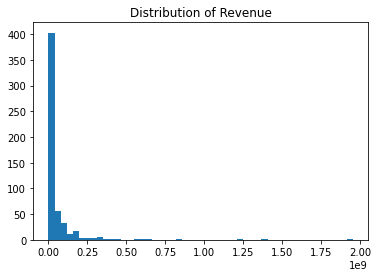

In [ ]:
revenue_distribution = [value for value in df_correlation["revenue_boxleiter"]]
plt.hist(revenue_distribution, bins = 50)
plt.title("Distribution of Revenue")
plt.show();

From the distribution the first assumption of normal distribution is not valid, since most of the games have similar values, which are close to 0. This also means, that our data most likely has some outliers as can be seen in the plot. We have some games which had a very high revenue. The data has to be transformed.

In [ ]:
# Lets check the Revenue-Observations
revenue_check = [value for value in df_correlation["revenue_boxleiter"]]
print(type(revenue_check))
print(len(revenue_check))

<class 'list'>
550


In [ ]:
# Now lets sort the list to see the top values 
# --> It can be seen that we have three values which are very high
sorted(revenue_check, reverse = True)
# Filter by < 1236309900.0

[1951140400.0,
 1366916200.0,
 1236309900.0,
 823788700.0,
 653888000.0,
 603297900.0,
 577679700.0,
 446260740.0,
 429855360.0,
 408499580.0,
 404394900.0,
 379318020.0,
 354413400.0,
 349891680.0,
 349614100.0,
 343064830.0,
 335934460.0,
 312476670.0,
 296189440.0,
 281325660.0,
 279308860.0,
 262850350.0,
 250665230.0,
 248607570.0,
 246636900.0,
 221988500.0,
 216549200.0,
 201703040.0,
 193713710.0,
 191512780.0,
 183975710.0,
 183383440.0,
 182286820.0,
 181659040.0,
 181140380.0,
 180989650.0,
 179902000.0,
 178920900.0,
 175646080.0,
 175165630.0,
 171875020.0,
 170535140.0,
 166480430.0,
 156592850.0,
 156216260.0,
 151826030.0,
 150107470.0,
 149345060.0,
 147635390.0,
 143702190.0,
 143593700.0,
 142954830.0,
 138951260.0,
 130588670.0,
 128921016.0,
 125637104.0,
 118903184.0,
 116874024.0,
 116104976.0,
 115101224.0,
 114273904.0,
 113100424.0,
 112466250.0,
 110997490.0,
 110734310.0,
 110241736.0,
 109228690.0,
 108558290.0,
 108412896.0,
 107861040.0,
 103550200.0,
 10

**Outlier Removal**

In [ ]:
# Subset the dataframe and exclude the top 3 values
df_correlation = df_correlation[(df_correlation["revenue_boxleiter"] < 1236309900.0) &
                                (df_correlation["revenue_boxleiter"] != 0)]

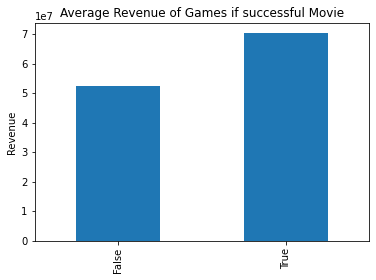

Average Revenue if game had no successful movie released on same date:  52368526 US-Dollar($)
Average Revenue if game had successful movie released on same date:  70190176 US-Dollar($)
Games with successful movies have on average: 17821650 US-Dollar($) more revenue


In [ ]:
# Now we have to check the mean values once again
# Now we check the mean for each category and plot the result
mean_success = df_correlation.groupby("has_successful_movie_or_serie")["revenue_boxleiter"].mean()
mean_success.plot(kind = "bar")
plt.title("Average Revenue of Games if successful Movie")
plt.xlabel("")
plt.ylabel("Revenue")
plt.show();
print("Average Revenue if game had no successful movie released on same date: ", round(mean_success[0]), "US-Dollar($)")
print("Average Revenue if game had successful movie released on same date: ", round(mean_success[1]), "US-Dollar($)")
print("Games with successful movies have on average:", round(mean_success[1] - mean_success[0]), "US-Dollar($) more revenue")

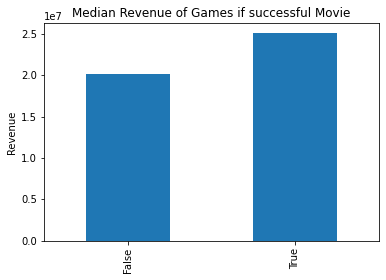

Median Revenue if game had no successful movie released on same date:  20218482 US-Dollar($)
Median Revenue if game had successful movie released on same date:  25073456 US-Dollar($)
Games with successful movies have a median value: 4854974 US-Dollar($) more revenue


In [ ]:
# Now we have to check the mean values once again
# Now we check the mean for each category and plot the result
mean_success = df_correlation.groupby("has_successful_movie_or_serie")["revenue_boxleiter"].median()
mean_success.plot(kind = "bar")
plt.title("Median Revenue of Games if successful Movie")
plt.xlabel("")
plt.ylabel("Revenue")
plt.show();
print("Median Revenue if game had no successful movie released on same date: ", round(mean_success[0]), "US-Dollar($)")
print("Median Revenue if game had successful movie released on same date: ", round(mean_success[1]), "US-Dollar($)")
print("Games with successful movies have a median value:", round(mean_success[1] - mean_success[0]), "US-Dollar($) more revenue")

The overall indication did not change when removing the outliers (or better the top 3 games). However the average value is not that highly different anymore.

**Visual Check Part 2 & Transforming the data**

In [ ]:
df_correlation["revenue_boxleiter"] = df_correlation["revenue_boxleiter"].astype("int")

Log transform the data to get a better glimpse on the distribution.

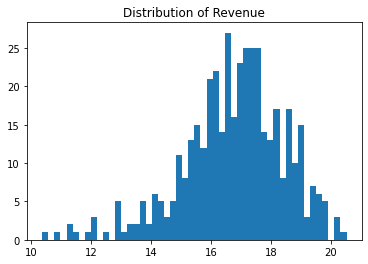

In [ ]:
import math
# Lets check the distribution once again --> We log the data
revenue_distribution = [math.log(value) for value in df_correlation["revenue_boxleiter"] if value != 0]
plt.hist(revenue_distribution, bins = 50)
plt.title("Distribution of Revenue")
plt.show();

In [ ]:
# Create two subgroups
revenue_movie_true = df_correlation[df_correlation["has_successful_movie_or_serie"] == True]
revenue_movie_false = df_correlation[df_correlation["has_successful_movie_or_serie"] == False]

In [ ]:
# Log-transform the two lists
revenue_true = [math.log(value) for value in revenue_movie_true["revenue_boxleiter"] if value != 0]
revenue_false = [math.log(value) for value in revenue_movie_false["revenue_boxleiter"] if value != 0]

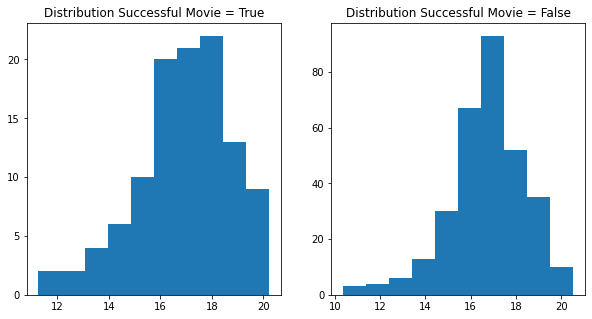

In [ ]:
# Plot the distribution
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))
ax1.hist(revenue_true)
ax1.set_title("Distribution Successful Movie = True")
ax2.hist(revenue_false)
ax2.set_title("Distribution Successful Movie = False")
plt.show();

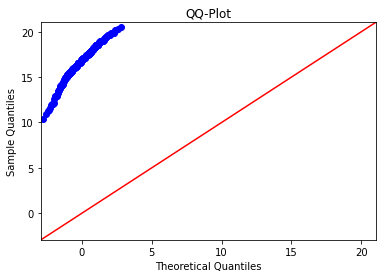

In [ ]:
# Visual Check with QQ-Plot
from scipy.stats import lognorm
import statsmodels.api as sm
revenue_numpy = np.array(revenue_distribution)
sm.qqplot(revenue_numpy, line ='45')
plt.title("QQ-Plot")
plt.show();

**Shapiro-Wilk Test for Normal Distribution**

Even though we assessed our assumption of normal distribution visually, where we could see that the data does not seem normally distributed. Now lets test this also formally using the Shapiro-Wilk-Test.

**H0**: Sample is from the normal distributions.(Po>0.05) <br>
**H1**: Sample is not from the normal distributions.

In [ ]:
from scipy.stats import shapiro 
shapiro(revenue_distribution)

ShapiroResult(statistic=0.9732802510261536, pvalue=5.45688635611441e-07)

Since the p-value is less than .05, we reject the null hypothesis. We have sufficient evidence to say that the sample data does not come from a normal distribution.

**Two Sample T-Test**

The assumptions to perform a T-Test are not given in our case. The data is not normally distributed, as could be seen visually and we also formally tested for normal distribution. However we still perform the T-Test so see and validate the outcome.

In [ ]:
revenue_false_numpy = np.array(revenue_false)
revenue_true_numpy = np.array(revenue_true)

In [ ]:
# Check the variance of the two samples
import scipy.stats as stats
print(np.var(revenue_false_numpy), np.var(revenue_true_numpy))
print("The ration between the two samples is:", np.var(revenue_true_numpy) / np.var(revenue_false_numpy))

2.7630728847052812 3.2602684034185456
The ration between the two samples is: 1.1799429618615713


The variances seem to be similiar, which would indicate that we are able to compute the test.

In [ ]:
stats.ttest_ind(a=revenue_false_numpy, b=revenue_true_numpy, equal_var=True)

Ttest_indResult(statistic=-1.129030425170859, pvalue=0.25952944622116886)

The p-value of the computed test is 0.259 which is greater than the defined threshold of 0.05. Therefore we fail to reject the null-hypothesis of the test. e do not have sufficient evidence to say that the mean revenue of the games between the two populations is different.

## Research Question 4: Is the steam revenue influenced by the number of spectators on Twitch?

In [ ]:
## Now as Dataframe

select_query = """ 
   select g.title, g.genre1, g.genre2, g.developer1,
		g.total_ratings, g.positivity, g.revenue_gamestats, g.revenue_boxleiter,
		g."action", g.adventure, g.action_and_adventure, g.has_another_developer,
		g.has_publisher, g.owners_estimation_steamspy, g.owners_estimation_gameachievements,
		g.revenue_gameachievements, g.average_playtime_forever, g.average_playtime_2weeks, 
		g.median_playtime_forever, g.current_price, g.initial_price, g.is_free,
		g.metacritic_score, g.total_nr_recommendations, g.release_date,
		g.tag1, g.tag2, g.tag3, g.has_dlc, m.movie_and_series_vote_average,
		m.movie_and_series_vote_count, m.movie_and_series_popularity, m.has_successful_movie_or_serie,
		dg.developer_name, t.user_name, t.viewer_count 
from games as g
left join has_same_genre as m on g.has_same_genre_id = m.has_same_genre_id
left join developed_games as dg on g.developed_games_id = dg.developed_games_id
left join twitch as t on g.title = t.title;
"""
cursor, conn = open_connection()
df_twitch = pd.read_sql_query(select_query, conn)
close_connection(conn)

df_twitch.head(5)

Connecting to the PostgreSQL database...
Connection successful
Connection closed


,title,genre1,genre2,developer1,total_ratings,positivity,revenue_gamestats,revenue_boxleiter,action,adventure,...,tag2,tag3,has_dlc,movie_and_series_vote_average,movie_and_series_vote_count,movie_and_series_popularity,has_successful_movie_or_serie,developer_name,user_name,viewer_count
0,New World,Action,Action,Amazon Games,202248.0,68.0,150000000.0,404394900.0,True,False,...,MMO,PvP,False,6.766666,10663.0,297.15698,True,Amazon Games,zackrawrr,18652.0
1,New World,Action,Action,Amazon Games,202248.0,68.0,150000000.0,404394900.0,True,False,...,MMO,PvP,False,6.766666,10663.0,297.15698,True,Amazon Games,YoDa,8623.0
2,New World,Action,Action,Amazon Games,202248.0,68.0,150000000.0,404394900.0,True,False,...,MMO,PvP,False,6.766666,10663.0,297.15698,True,Amazon Games,BagginsTV,6305.0
3,New World,Action,Action,Amazon Games,202248.0,68.0,150000000.0,404394900.0,True,False,...,MMO,PvP,False,6.766666,10663.0,297.15698,True,Amazon Games,DannehTV,5140.0
4,New World,Action,Action,Amazon Games,202248.0,68.0,150000000.0,404394900.0,True,False,...,MMO,PvP,False,6.766666,10663.0,297.15698,True,Amazon Games,Towelliee,4682.0


In [ ]:
# Subset the dataframe to the columns / variables needed
columns = ["title", "revenue_boxleiter", "viewer_count", 'genre1','user_name']
df_twitch = df_twitch.reindex(columns=columns)
df_twitch.head(5)

,title,revenue_boxleiter,viewer_count,genre1,user_name
0,New World,404394900.0,18652.0,Action,zackrawrr
1,New World,404394900.0,8623.0,Action,YoDa
2,New World,404394900.0,6305.0,Action,BagginsTV
3,New World,404394900.0,5140.0,Action,DannehTV
4,New World,404394900.0,4682.0,Action,Towelliee


In [ ]:
df_twitch.shape

(7689, 5)

In [ ]:
df_twitch.isna().sum()

title                   0
revenue_boxleiter    4376
viewer_count         2804
genre1                  0
user_name            2804
dtype: int64

In [ ]:
df_twitch = df_twitch[df_twitch["revenue_boxleiter"] > 0]

In [ ]:
df_twitch = df_twitch.dropna()
df_twitch

,title,revenue_boxleiter,viewer_count,genre1,user_name
0,New World,4.043949e+08,18652.0,Action,zackrawrr
1,New World,4.043949e+08,8623.0,Action,YoDa
2,New World,4.043949e+08,6305.0,Action,BagginsTV
3,New World,4.043949e+08,5140.0,Action,DannehTV
4,New World,4.043949e+08,4682.0,Action,Towelliee
...,...,...,...,...,...
4755,Grand Theft Auto V,1.951140e+09,1675.0,Action,4HEAD
4756,Grand Theft Auto V,1.951140e+09,1650.0,Action,bananabrea
4757,Grand Theft Auto V,1.951140e+09,1568.0,Action,Vader
4758,Grand Theft Auto V,1.951140e+09,1418.0,Action,heaveNBUL


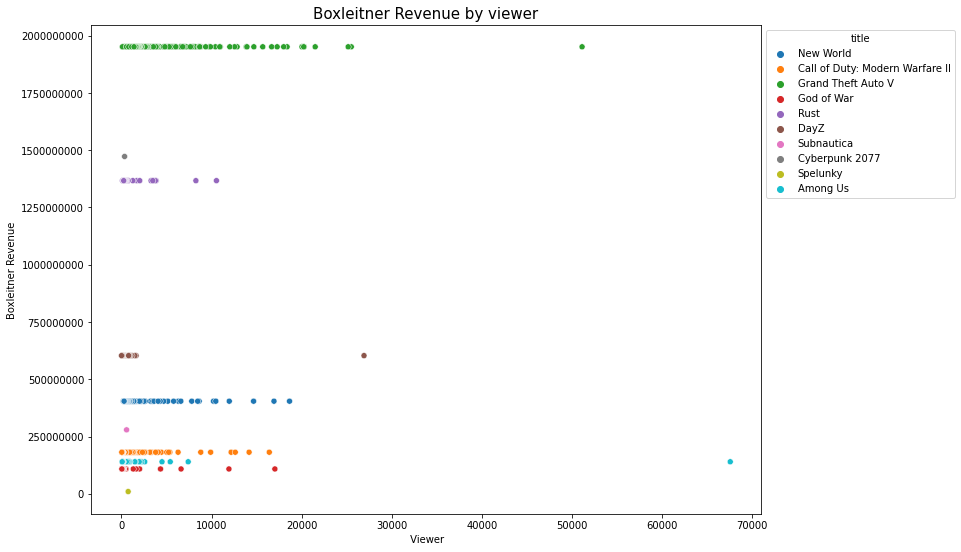

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Define the plot
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize=(12,9))

# Specify the axis and title
ax1 = sns.scatterplot('viewer_count', 'revenue_boxleiter', data=df_twitch, hue= df_twitch['title'])
ax1.set_title("Boxleitner Revenue by viewer",
              size = 15)
ax1.set_xlabel(" Viewer")
ax1.set_ylabel("Boxleitner Revenue")
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
plt.ticklabel_format(style='plain', axis='y')
plt.show();

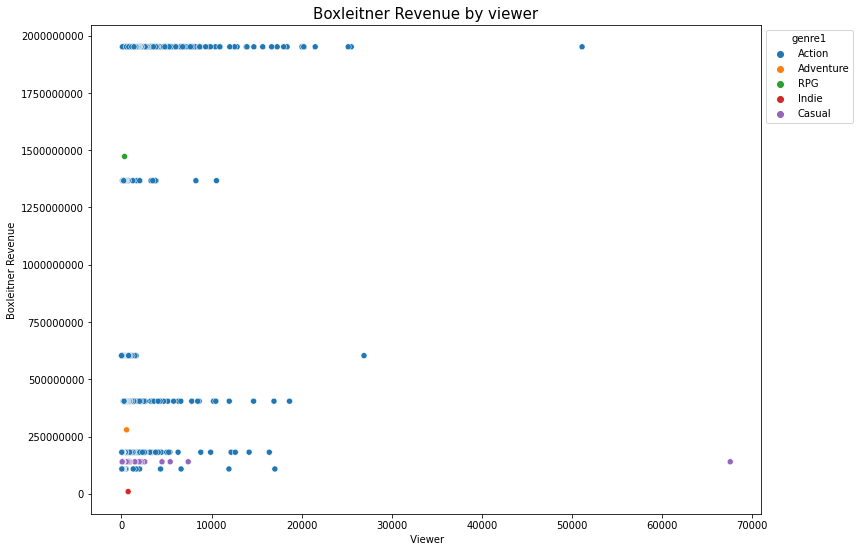

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Define the plot
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize=(12,9))

# Specify the axis and title
ax1 = sns.scatterplot('viewer_count', 'revenue_boxleiter', data=df_twitch, hue= df_twitch['genre1'])
ax1.set_title("Boxleitner Revenue by viewer",
              size = 15)
ax1.set_xlabel(" Viewer")
ax1.set_ylabel("Boxleitner Revenue")
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
plt.ticklabel_format(style='plain', axis='y')
plt.show();

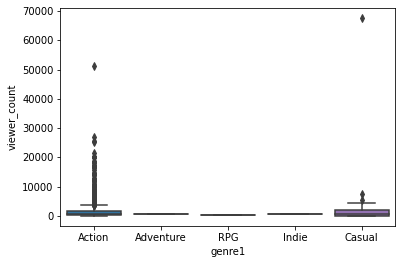

In [ ]:
 sns.boxplot(x=df_twitch['genre1'], y=df_twitch['viewer_count'])

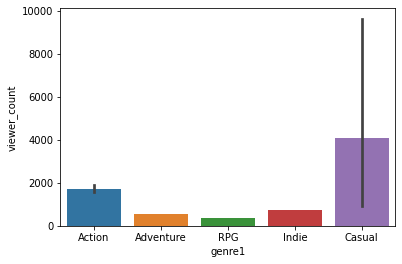

In [ ]:
 sns.barplot(x=df_twitch['genre1'], y=df_twitch['viewer_count'])

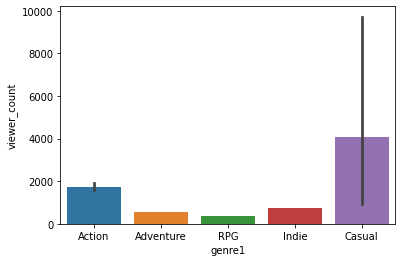

In [ ]:
 sns.barplot(x=df_twitch['genre1'], y=df_twitch['viewer_count'])

In [ ]:
print(df_twitch['viewer_count'].describe())

count     1402.000000
mean      1773.898716
std       3638.583437
min          3.000000
25%        400.250000
50%        786.000000
75%       1727.500000
max      67574.000000
Name: viewer_count, dtype: float64


## PCA

PCA is designed for continuous variables. It tries to minimize variance between all variables (=squared deviations). The way PCA is a valid method for feature selection and represents the important variables as the ones with the most variation in them.

The goal of PCA is to reduce the dimension while accounting for as much as possible of the variation in the data. With reduced dimensions its possible to plot the first two PC in a 2D or the first three PC in a 3D space.

### PCA on Target Genre

In [ ]:
select_query_pca = """ 
  SELECT g.genre1, g.total_ratings, g.positivity, g.metacritic_score, g.total_nr_recommendations,
    g.initial_price,
    g.release_date,
    g. required_age,
    g.revenue_gamestats, g.revenue_boxleiter, g.revenue_gameachievements, 
		g.has_another_developer, g.has_publisher, g.has_dlc,
    g.owners_estimation_gameachievements,
		g.average_playtime_forever, g.average_playtime_2weeks, g.median_playtime_forever,g.median_playtime_2weeks, g.ccu,
    m.movie_and_series_vote_average, m.movie_and_series_vote_count, m.movie_and_series_popularity,
    sg.viewer_count 
FROM games as g
LEFT JOIN developed_games as dg on g.developed_games_id = dg.developed_games_id
LEFT JOIN has_same_genre as m on g.has_same_genre_id = m.has_same_genre_id
LEFT JOIN streamed_games sg  on g.steam_app_id = sg.steam_app_id
"""
cursor, conn = open_connection()
df_pca = pd.read_sql_query(select_query_pca, conn)
close_connection(conn)

df_pca

Connecting to the PostgreSQL database...
Connection successful
Connection closed


,genre1,total_ratings,positivity,metacritic_score,total_nr_recommendations,initial_price,release_date,required_age,revenue_gamestats,revenue_boxleiter,...,owners_estimation_gameachievements,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,ccu,movie_and_series_vote_average,movie_and_series_vote_count,movie_and_series_popularity,viewer_count
0,Action,202248.0,68.0,70.0,203911.0,39.99,2021-09-01,0.0,150000000.0,404394900.0,...,NaN,8508.0,983.0,3645.0,154.0,48338.0,6.766666,10663.0,297.15698,18652.0
1,Action,202248.0,68.0,70.0,203911.0,39.99,2021-09-01,0.0,150000000.0,404394900.0,...,NaN,8508.0,983.0,3645.0,154.0,48338.0,6.766666,10663.0,297.15698,8623.0
2,Action,202248.0,68.0,70.0,203911.0,39.99,2021-09-01,0.0,150000000.0,404394900.0,...,NaN,8508.0,983.0,3645.0,154.0,48338.0,6.766666,10663.0,297.15698,6305.0
3,Action,202248.0,68.0,70.0,203911.0,39.99,2021-09-01,0.0,150000000.0,404394900.0,...,NaN,8508.0,983.0,3645.0,154.0,48338.0,6.766666,10663.0,297.15698,5140.0
4,Action,202248.0,68.0,70.0,203911.0,39.99,2021-09-01,0.0,150000000.0,404394900.0,...,NaN,8508.0,983.0,3645.0,154.0,48338.0,6.766666,10663.0,297.15698,4682.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7684,Action,11.0,100.0,NaN,NaN,NaN,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7685,Action,552.0,87.0,NaN,NaN,NaN,None,NaN,95000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7686,Action,2545.0,79.0,NaN,NaN,NaN,None,NaN,1200000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7687,Adventure,5794.0,NaN,76.0,5794.0,4.99,2015-10-01,0.0,NaN,1445602.9,...,176148.0,258.0,0.0,254.0,0.0,216.0,NaN,NaN,NaN,NaN


In [ ]:
select_query_distinct = """ 
SELECT distinct genre1 FROM games ORDER BY genre1
"""
cursor, conn = open_connection()
df_genre = pd.read_sql_query(select_query_distinct, conn)
close_connection(conn)

target = df_genre["genre1"].values.tolist()
print(target)

Connecting to the PostgreSQL database...
Connection successful
Connection closed
['Action', 'Adventure', 'Animation & Modeling', 'Audio Production', 'Casual', 'Design & Illustration', 'Free to Play', 'Gore', 'Indie', 'Massively Multiplayer', 'NaN', 'Racing', 'RPG', 'Simulation', 'Sports', 'Strategy', 'Utilities']


In [ ]:
amount_genre = df_pca["genre1"].value_counts()
amount_genre

Action                   6031
Indie                     366
Adventure                 362
Casual                    273
Simulation                259
Strategy                  147
RPG                        84
Racing                     74
Free to Play               54
Massively Multiplayer      12
NaN                        11
Utilities                   5
Sports                      4
Animation & Modeling        3
Design & Illustration       2
Gore                        1
Audio Production            1
Name: genre1, dtype: int64

#### Preprocessing the Data

In [ ]:
# Add Release Date as Integer instead of Datetime, because PCA can not handle datetime values
release_year_list = []
release_month_list = []

for i in df_pca["release_date"]:
  if pd.notnull(i):
    release_year = i.year
    release_year_list.append(release_year)
    release_month =  i.month
    release_month_list.append(release_month) 
  else: 
    i
    release_year_list.append(i)
    release_month_list.append(i) 

df_pca["release_year"] = release_year_list
df_pca["release_month"] = release_month_list

In [ ]:
df_pca

,genre1,total_ratings,positivity,metacritic_score,total_nr_recommendations,initial_price,release_date,required_age,revenue_gamestats,revenue_boxleiter,...,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,ccu,movie_and_series_vote_average,movie_and_series_vote_count,movie_and_series_popularity,viewer_count,release_year,release_month
0,Action,202248.0,68.0,70.0,203911.0,39.99,2021-09-01,0.0,150000000.0,404394900.0,...,983.0,3645.0,154.0,48338.0,6.766666,10663.0,297.15698,18652.0,2021.0,9.0
1,Action,202248.0,68.0,70.0,203911.0,39.99,2021-09-01,0.0,150000000.0,404394900.0,...,983.0,3645.0,154.0,48338.0,6.766666,10663.0,297.15698,8623.0,2021.0,9.0
2,Action,202248.0,68.0,70.0,203911.0,39.99,2021-09-01,0.0,150000000.0,404394900.0,...,983.0,3645.0,154.0,48338.0,6.766666,10663.0,297.15698,6305.0,2021.0,9.0
3,Action,202248.0,68.0,70.0,203911.0,39.99,2021-09-01,0.0,150000000.0,404394900.0,...,983.0,3645.0,154.0,48338.0,6.766666,10663.0,297.15698,5140.0,2021.0,9.0
4,Action,202248.0,68.0,70.0,203911.0,39.99,2021-09-01,0.0,150000000.0,404394900.0,...,983.0,3645.0,154.0,48338.0,6.766666,10663.0,297.15698,4682.0,2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7684,Action,11.0,100.0,NaN,NaN,NaN,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7685,Action,552.0,87.0,NaN,NaN,NaN,None,NaN,95000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7686,Action,2545.0,79.0,NaN,NaN,NaN,None,NaN,1200000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7687,Adventure,5794.0,NaN,76.0,5794.0,4.99,2015-10-01,0.0,NaN,1445602.9,...,0.0,254.0,0.0,216.0,NaN,NaN,NaN,NaN,2015.0,10.0


In [ ]:
# Drop column:
df_pca.drop(columns = ["release_date"], inplace=True, axis = 1)

# Drop rows with certain values:

df_pca = df_pca[df_pca.genre1.notnull()]
df_pca=df_pca.query("genre1 != 'Animation & Modeling'")
df_pca=df_pca.query("genre1 != 'Audio Production'")
df_pca=df_pca.query("genre1 != 'Design & Illustration'")
df_pca=df_pca.query("genre1 != 'Utilities'")
df_pca=df_pca.query("genre1 != 'Gore'")
df_pca=df_pca.query("genre1 != 'Massively Multiplayer'")
df_pca=df_pca.query("genre1 != 'Free to Play'")

target.remove ('Animation & Modeling') 
target.remove ('Audio Production') 
target.remove ('Design & Illustration') 
target.remove ('NaN') 
target.remove ('Utilities') 
target.remove ('Gore') 
target.remove ('Sports') 
target.remove ('Massively Multiplayer') 
target.remove ('Free to Play') 
target

['Action',
 'Adventure',
 'Casual',
 'Indie',
 'Racing',
 'RPG',
 'Simulation',
 'Strategy']

In [ ]:
print(len(target))
print(len(df_pca))

8
7611


In [ ]:
df_pca.dtypes

genre1                                 object
total_ratings                         float64
positivity                            float64
metacritic_score                      float64
total_nr_recommendations              float64
initial_price                         float64
required_age                          float64
revenue_gamestats                     float64
revenue_boxleiter                     float64
revenue_gameachievements              float64
has_another_developer                    bool
has_publisher                            bool
has_dlc                                object
owners_estimation_gameachievements    float64
average_playtime_forever              float64
average_playtime_2weeks               float64
median_playtime_forever               float64
median_playtime_2weeks                float64
ccu                                   float64
movie_and_series_vote_average         float64
movie_and_series_vote_count           float64
movie_and_series_popularity       

In [ ]:
from sklearn.preprocessing import StandardScaler

# Get the Feature columns
features = df_pca.loc[:, df_pca.columns != 'genre1']

# Imputation for Missing Values - this is needed for the PCA Loadings
features = features.fillna(features.median())

# Drop the rest of the not imputated data
features_dropped = features.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
features_dropped.shape

# Get Feature Names
feature_names = list(features_dropped.columns)

# Separating out the features
x = features.values

# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-0.52335142, -1.64176781, -3.65201348, ...,  2.10010639,
         1.37487821,  0.2408538 ],
       [-0.52335142, -1.64176781, -3.65201348, ...,  0.87839669,
         1.37487821,  0.2408538 ],
       [-0.52335142, -1.64176781, -3.65201348, ...,  0.59602327,
         1.37487821,  0.2408538 ],
       ...,
       [-0.62068732, -0.45625744,  0.04457558, ..., -0.10759576,
         0.0730372 ,  0.2408538 ],
       [-0.61910375,  0.19038457, -2.41981712, ..., -0.10759576,
        -1.22880382,  0.65795011],
       [-0.62187659, -1.3184468 ,  0.04457558, ..., -0.10759576,
         0.0730372 ,  0.2408538 ]])

#### Conduct PCA

In [ ]:
from sklearn.decomposition import PCA

## Finding the principle components
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)

#### Loadings and Variance of the Ratio

In [ ]:
# Lets get the loadings

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC-3','PC-4','PC-5', 'PC-6'], index = feature_names)
loadings

,PC1,PC2,PC-3,PC-4,PC-5,PC-6
total_ratings,-0.005723,-0.013367,0.160366,-0.495983,-0.308422,0.105801
positivity,-0.045102,0.115006,-0.235304,-0.300292,0.159994,0.011422
metacritic_score,0.222544,0.064681,0.082071,-0.227697,0.169576,-0.358665
total_nr_recommendations,0.403606,-0.047233,0.086909,0.045768,-0.124397,-0.001588
initial_price,0.077488,0.416886,-0.107776,-0.004451,-0.181595,0.069795
required_age,0.273717,0.323318,-0.159498,0.061652,-0.060659,-0.013090
revenue_gamestats,-0.029004,-0.034594,-0.008245,0.090370,-0.110902,0.528455
revenue_boxleiter,0.396071,0.076044,-0.135388,-0.066701,0.041494,0.045572
revenue_gameachievements,0.360238,0.100663,-0.124468,-0.155632,0.155772,0.030617
has_another_developer,-0.097754,0.261870,0.092059,-0.346897,-0.379746,0.021653


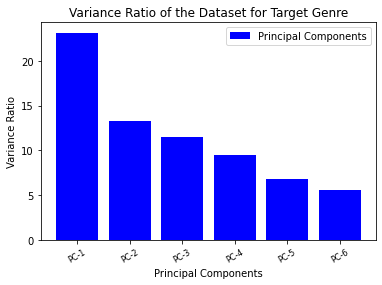

In [ ]:
# Variance Ratio
n=pca.explained_variance_ratio_

plt.bar([1,2,3,4,5,6],list(n*100),label='Principal Components',color='b')
plt.legend()
plt.xlabel('Principal Components')
plt.xticks([1,2,3,4,5,6],['PC-1','PC-2','PC-3','PC-4','PC-5', 'PC-6'], fontsize=8, rotation=30)
plt.ylabel('Variance Ratio')
plt.title('Variance Ratio of the Dataset for Target Genre')
plt.show()

In [ ]:
n

array([0.23130612, 0.13313325, 0.11528747, 0.09498917, 0.06767029,
       0.05536086])

In [ ]:
print(n[0] + n[1])

0.36443936894758


PC-1 and PC 2 can explain only 37 % of the variance in the data

In [ ]:
n[0] + n[1]  + n[2] 

0.47972683461206905

PC-1 and PC-2 and PC-3 can explain only 48 % of the variance in the data

#### Visualization in 2D

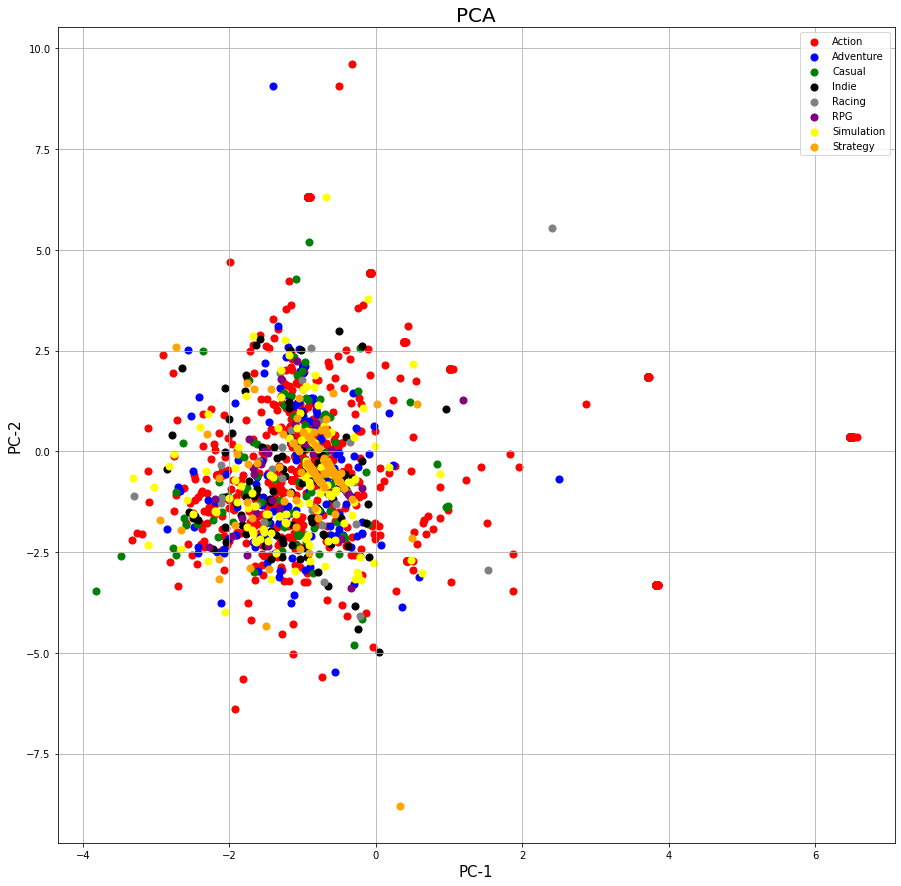

In [ ]:
## Plot PC-1 and PC-2 in a two-dimensional space:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC-1', 'PC-2'])
# Adding lables
finalDf = pd.concat([principalDf, df_pca[['genre1']]], axis = 1)
# Plotting pc1 & pc2
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC-1', fontsize = 15)
ax.set_ylabel('PC-2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = target
colors = ["red", "blue", "green", "black", "grey", "purple", "yellow", "orange", "pink"]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['genre1'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC-1']
               , finalDf.loc[indicesToKeep, 'PC-2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show() # FOR SHOWING THE PLOT

In [ ]:
# Reload Target if necessary
select_query_distinct = """ 
SELECT distinct genre1 FROM games ORDER BY genre1
"""
cursor, conn = open_connection()
df_genre = pd.read_sql_query(select_query_distinct, conn)
close_connection(conn)

target = df_genre["genre1"].values.tolist()

target.remove ('Animation & Modeling') 
target.remove ('Audio Production') 
target.remove ('Design & Illustration') 
target.remove ('NaN') 
target.remove ('Utilities') 
target.remove ('Gore') 
target.remove ('Sports') 
target.remove ('Massively Multiplayer') 
target.remove ('Free to Play') 
target

Connecting to the PostgreSQL database...
Connection successful
Connection closed


['Action',
 'Adventure',
 'Casual',
 'Indie',
 'Racing',
 'RPG',
 'Simulation',
 'Strategy']

No clusters detectable with PCA on 2D space.

### PCA on Target Release Year

In [ ]:
select_query_pca2 = """ 
  SELECT g.total_ratings, g.positivity, g.metacritic_score, g.total_nr_recommendations,
    g.initial_price,
    g.release_date,
    g. required_age,
    g.revenue_gamestats, g.revenue_boxleiter, g.revenue_gameachievements, 
		g.has_another_developer, g.has_publisher, g.has_dlc,
    g.owners_estimation_gameachievements,
		g.average_playtime_forever, g.average_playtime_2weeks, g.median_playtime_forever,g.median_playtime_2weeks, g.ccu,
    m.movie_and_series_vote_average, m.movie_and_series_vote_count, m.movie_and_series_popularity,
    sg.viewer_count 
FROM games as g
LEFT JOIN developed_games as dg on g.developed_games_id = dg.developed_games_id
LEFT JOIN has_same_genre as m on g.has_same_genre_id = m.has_same_genre_id
LEFT JOIN streamed_games sg  on g.steam_app_id = sg.steam_app_id
"""
cursor, conn = open_connection()
df_pca2 = pd.read_sql_query(select_query_pca2, conn)
close_connection(conn)

df_pca2

Connecting to the PostgreSQL database...
Connection successful
Connection closed


,total_ratings,positivity,metacritic_score,total_nr_recommendations,initial_price,release_date,required_age,revenue_gamestats,revenue_boxleiter,revenue_gameachievements,...,owners_estimation_gameachievements,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,ccu,movie_and_series_vote_average,movie_and_series_vote_count,movie_and_series_popularity,viewer_count
0,202248.0,68.0,70.0,203911.0,39.99,2021-09-01,0.0,150000000.0,404394900.0,NaN,...,NaN,8508.0,983.0,3645.0,154.0,48338.0,6.766666,10663.0,297.15698,18652.0
1,202248.0,68.0,70.0,203911.0,39.99,2021-09-01,0.0,150000000.0,404394900.0,NaN,...,NaN,8508.0,983.0,3645.0,154.0,48338.0,6.766666,10663.0,297.15698,8623.0
2,202248.0,68.0,70.0,203911.0,39.99,2021-09-01,0.0,150000000.0,404394900.0,NaN,...,NaN,8508.0,983.0,3645.0,154.0,48338.0,6.766666,10663.0,297.15698,6305.0
3,202248.0,68.0,70.0,203911.0,39.99,2021-09-01,0.0,150000000.0,404394900.0,NaN,...,NaN,8508.0,983.0,3645.0,154.0,48338.0,6.766666,10663.0,297.15698,5140.0
4,202248.0,68.0,70.0,203911.0,39.99,2021-09-01,0.0,150000000.0,404394900.0,NaN,...,NaN,8508.0,983.0,3645.0,154.0,48338.0,6.766666,10663.0,297.15698,4682.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7684,11.0,100.0,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7685,552.0,87.0,NaN,NaN,NaN,None,NaN,95000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7686,2545.0,79.0,NaN,NaN,NaN,None,NaN,1200000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7687,5794.0,NaN,76.0,5794.0,4.99,2015-10-01,0.0,NaN,1445602.9,878978.5,...,176148.0,258.0,0.0,254.0,0.0,216.0,NaN,NaN,NaN,NaN


In [ ]:
select_query_distinct = """ 
SELECT DISTINCT EXTRACT(YEAR FROM release_date) as release_year FROM games ORDER BY release_year
"""
cursor, conn = open_connection()
df_release_year = pd.read_sql_query(select_query_distinct, conn)
close_connection(conn)

target = df_release_year["release_year"].values.tolist()
print(target)

Connecting to the PostgreSQL database...
Connection successful
Connection closed
[1997.0, 1998.0, 1999.0, 2000.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, nan]


#### Preprocessing the Data

In [ ]:
# Add Release Date as Integer instead of Datetime, because PCA can not handle datetime values
release_year_list = []
release_month_list = []

for i in df_pca2["release_date"]:
  if pd.notnull(i):
    release_year = i.year
    release_year_list.append(release_year)
    release_month =  i.month
    release_month_list.append(release_month) 
  else: 
    i
    release_year_list.append(i)
    release_month_list.append(i) 

df_pca2["release_year"] = release_year_list
df_pca2["release_month"] = release_month_list



In [ ]:
amount_release_year = df_pca2["release_year"].value_counts()
amount_release_year

2015.0    877
2020.0    804
2022.0    464
2017.0    293
2021.0    238
2018.0    165
2013.0    113
2016.0     76
2014.0     74
2019.0     70
2012.0     47
2011.0     39
2010.0     30
2009.0     26
2008.0     19
2007.0     15
2006.0     10
2004.0      4
2005.0      1
2000.0      1
2003.0      1
1997.0      1
2002.0      1
1999.0      1
1998.0      1
Name: release_year, dtype: int64

In [ ]:
# Drop column:
df_pca2.drop(columns = ["release_date"], inplace=True, axis = 1)

# Drop rows with certain values:
df_pca2 = df_pca2[df_pca2.release_year.notnull()]

df_pca2=df_pca2.query("release_year != 1997.0")
df_pca2=df_pca2.query("release_year != 1998.0")
df_pca2=df_pca2.query("release_year != 1999.0")
df_pca2=df_pca2.query("release_year != 2000.0")
df_pca2=df_pca2.query("release_year != 2002.0")
df_pca2=df_pca2.query("release_year != 2003.0")
df_pca2=df_pca2.query("release_year != 2004.0")
df_pca2=df_pca2.query("release_year != 2005.0")


import math 
target = [x for x in target if (math.isnan(x) == False)]
target.remove (1997.0) 
target.remove (1998.0) 
target.remove (1999.0) 
target.remove (2000.0) 
target.remove (2002.0) 
target.remove (2003.0) 
target.remove (2004.0)
target.remove (2005.0)

target

[2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2018.0,
 2019.0,
 2020.0,
 2021.0,
 2022.0]

In [ ]:
print(len(target))
print(len(df_pca2))

17
3360


In [ ]:
df_pca2.dtypes

total_ratings                         float64
positivity                            float64
metacritic_score                      float64
total_nr_recommendations              float64
initial_price                         float64
required_age                          float64
revenue_gamestats                     float64
revenue_boxleiter                     float64
revenue_gameachievements              float64
has_another_developer                    bool
has_publisher                            bool
has_dlc                                object
owners_estimation_gameachievements    float64
average_playtime_forever              float64
average_playtime_2weeks               float64
median_playtime_forever               float64
median_playtime_2weeks                float64
ccu                                   float64
movie_and_series_vote_average         float64
movie_and_series_vote_count           float64
movie_and_series_popularity           float64
viewer_count                      

In [ ]:
from sklearn.preprocessing import StandardScaler

# Get the Feature columns
features = df_pca2.loc[:, df_pca2.columns != 'release_year']

# Imputation for Missing Values - this is needed for the PCA Loadings
features = features.fillna(features.median())

# Drop the rest of the not imputated data
features_dropped = features.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
features_dropped.shape

# Get Feature Names
feature_names = list(features_dropped.columns)

# Get Feature values
x2 = features_dropped.values

# Standardizing the features
x2 = StandardScaler().fit_transform(x2)
x2

array([[-0.64672843, -2.01316663, -2.40954571, ...,  2.08346341,
         5.79243926,  0.38471539],
       [-0.64672843, -2.01316663, -2.40954571, ...,  2.08346341,
         2.43276507,  0.38471539],
       [-0.64672843, -2.01316663, -2.40954571, ...,  2.08346341,
         1.65624451,  0.38471539],
       ...,
       [ 0.28204349,  1.74780393,  0.0664019 , ...,  0.28920109,
        -0.25122232,  0.95744189],
       [-0.94729572,  0.27027978, -1.58422984, ...,  1.65977592,
        -0.25122232,  0.38471539],
       [-0.97609937,  0.27027978, -1.58422984, ...,  0.28920109,
        -0.25122232,  0.67107864]])

In [ ]:
# Separating out the target
y2 = df_pca2.loc[:,['release_year']].values
y2

array([[2021.],
       [2021.],
       [2021.],
       ...,
       [2006.],
       [2011.],
       [2015.]])

#### Conduct PCA

In [ ]:
from sklearn.decomposition import PCA

## Finding the principle components
pca2 = PCA(n_components=6)
principalComponents = pca2.fit_transform(x2)

#### Loadings and Variance of the Ratio

In [ ]:
# Lets get the loadings

loadings = pd.DataFrame(pca2.components_.T, columns=['PC1', 'PC2','PC-3','PC-4','PC-5', 'PC-6'], index = feature_names)
loadings

,PC1,PC2,PC-3,PC-4,PC-5,PC-6
total_ratings,0.395980,0.024743,0.092918,0.031063,-0.112095,0.016163
positivity,-0.177178,0.177577,-0.378378,0.271192,-0.001926,0.001905
metacritic_score,0.199370,0.235646,-0.056349,0.252358,-0.254004,-0.011349
total_nr_recommendations,0.385529,0.114405,-0.003855,-0.136935,-0.073374,0.071474
initial_price,-0.062611,0.375463,0.031232,-0.319322,0.113300,-0.191798
required_age,0.082280,0.417852,-0.112649,-0.138885,0.017478,0.055606
revenue_gamestats,-0.014696,-0.136275,0.040002,-0.367330,0.481908,-0.306628
revenue_boxleiter,0.291590,0.246565,-0.252251,-0.070881,0.089853,-0.032078
revenue_gameachievements,0.005304,0.221249,-0.070266,0.237352,0.313631,-0.460504
has_another_developer,-0.194396,0.282153,0.192733,-0.132101,-0.076077,-0.129843


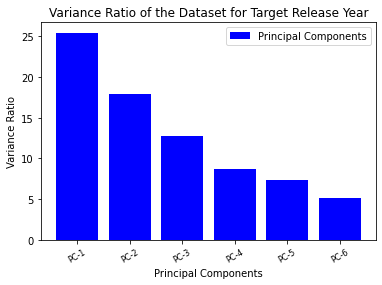

In [ ]:
# Variance Ratio
n=pca2.explained_variance_ratio_

plt.bar([1,2,3,4,5,6],list(n*100),label='Principal Components',color='b')
plt.legend()
plt.xlabel('Principal Components')
plt.xticks([1,2,3,4,5,6],['PC-1','PC-2','PC-3','PC-4','PC-5', 'PC-6'], fontsize=8, rotation=30)
plt.ylabel('Variance Ratio')
plt.title('Variance Ratio of the Dataset for Target Release Year')
plt.show()

In [ ]:
print(n[0] + n[1])

0.43305538655212517


In [ ]:
x2.shape

(3360, 23)

PC-1 and PC 2 can explain  *43* % of the variance in the data

#### Visualization in 2D

In [ ]:
# Create dataframe
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(x2)
pca_df = pd.DataFrame(data=principalComponents2, columns=['PC1', 'PC2'])

pca_df['target'] = y2

pca_df.head()

,PC1,PC2,target
0,0.381227,-2.711086,2021.0
1,0.107089,-2.744381,2021.0
2,0.043728,-2.752077,2021.0
3,0.011883,-2.755945,2021.0
4,-0.000636,-2.757465,2021.0


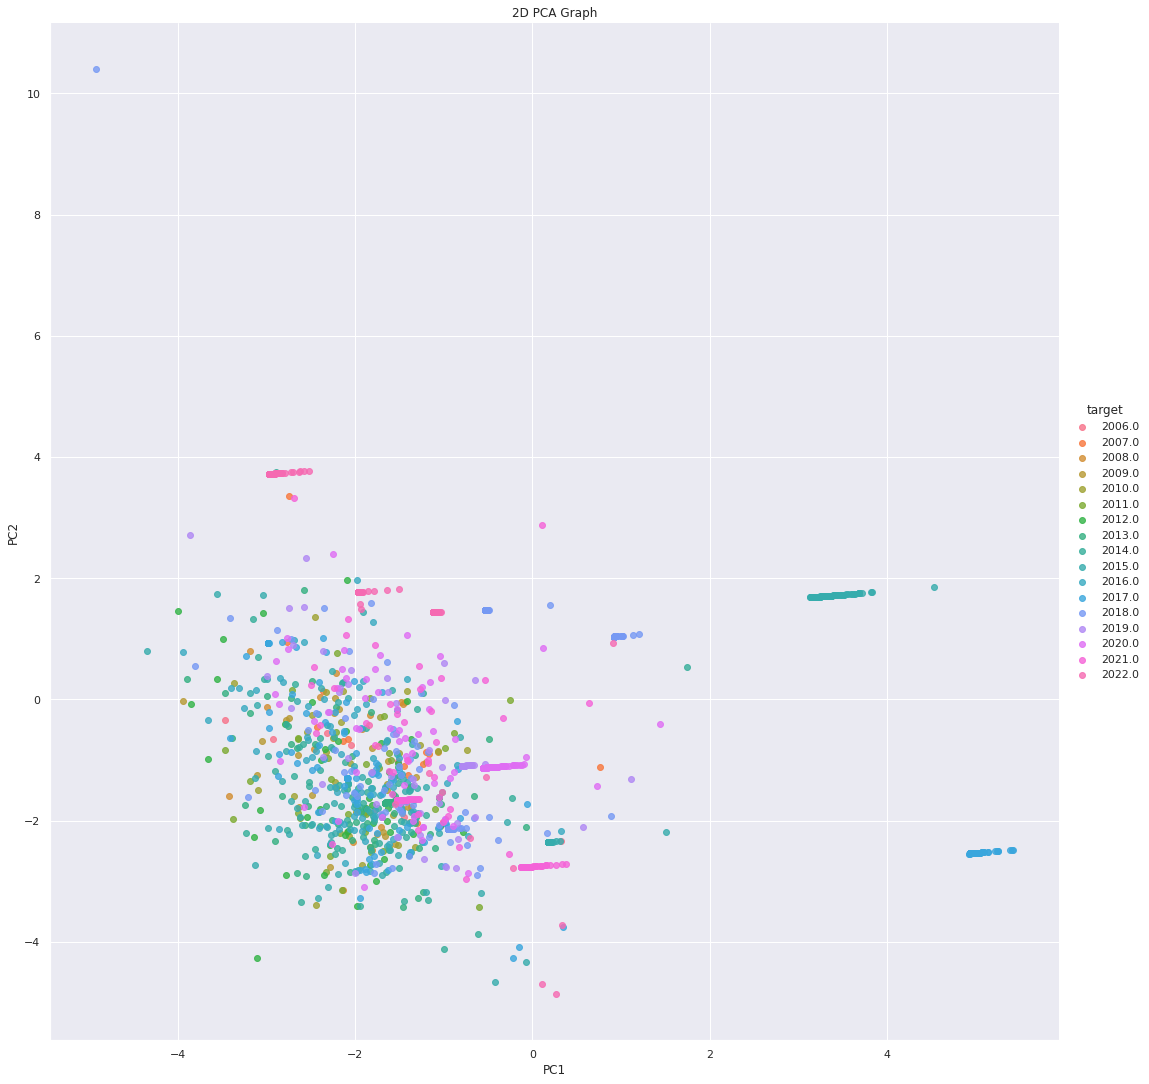

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

sns.lmplot( x='PC1',  y='PC2', data=pca_df, hue='target', fit_reg=False, legend=True, size=15)
plt.title('2D PCA Graph')
plt.show()

No clusters detectable with PCA on 2D space.

### PCA on Target Sucessful Series/Film

In [ ]:
select_query_pca3 = """ 
  SELECT m.has_successful_movie_or_serie,
    g.total_ratings, g.positivity, g.metacritic_score, g.total_nr_recommendations,
    g.initial_price,
    g.release_date,
    g. required_age,
    g.revenue_gamestats, g.revenue_boxleiter, g.revenue_gameachievements, 
		g.has_another_developer, g.has_publisher, g.has_dlc,
    g.owners_estimation_gameachievements,
		g.average_playtime_forever, g.average_playtime_2weeks, g.median_playtime_forever,g.median_playtime_2weeks, g.ccu,
    m.movie_and_series_vote_average, m.movie_and_series_vote_count, m.movie_and_series_popularity,
    sg.viewer_count 
FROM games as g
LEFT JOIN developed_games as dg on g.developed_games_id = dg.developed_games_id
LEFT JOIN has_same_genre as m on g.has_same_genre_id = m.has_same_genre_id
LEFT JOIN streamed_games sg  on g.steam_app_id = sg.steam_app_id
"""
cursor, conn = open_connection()
df_pca3 = pd.read_sql_query(select_query_pca3, conn)
close_connection(conn)

df_pca3

Connecting to the PostgreSQL database...
Connection successful
Connection closed


,has_successful_movie_or_serie,total_ratings,positivity,metacritic_score,total_nr_recommendations,initial_price,release_date,required_age,revenue_gamestats,revenue_boxleiter,...,owners_estimation_gameachievements,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,ccu,movie_and_series_vote_average,movie_and_series_vote_count,movie_and_series_popularity,viewer_count
0,True,202248.0,68.0,70.0,203911.0,39.99,2021-09-01,0.0,150000000.0,404394900.0,...,NaN,8508.0,983.0,3645.0,154.0,48338.0,6.766666,10663.0,297.15698,18652.0
1,True,202248.0,68.0,70.0,203911.0,39.99,2021-09-01,0.0,150000000.0,404394900.0,...,NaN,8508.0,983.0,3645.0,154.0,48338.0,6.766666,10663.0,297.15698,8623.0
2,True,202248.0,68.0,70.0,203911.0,39.99,2021-09-01,0.0,150000000.0,404394900.0,...,NaN,8508.0,983.0,3645.0,154.0,48338.0,6.766666,10663.0,297.15698,6305.0
3,True,202248.0,68.0,70.0,203911.0,39.99,2021-09-01,0.0,150000000.0,404394900.0,...,NaN,8508.0,983.0,3645.0,154.0,48338.0,6.766666,10663.0,297.15698,5140.0
4,True,202248.0,68.0,70.0,203911.0,39.99,2021-09-01,0.0,150000000.0,404394900.0,...,NaN,8508.0,983.0,3645.0,154.0,48338.0,6.766666,10663.0,297.15698,4682.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7684,False,11.0,100.0,NaN,NaN,NaN,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7685,False,552.0,87.0,NaN,NaN,NaN,None,NaN,95000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7686,False,2545.0,79.0,NaN,NaN,NaN,None,NaN,1200000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7687,False,5794.0,NaN,76.0,5794.0,4.99,2015-10-01,0.0,NaN,1445602.9,...,176148.0,258.0,0.0,254.0,0.0,216.0,NaN,NaN,NaN,NaN


In [ ]:
select_query_distinct = """ 
SELECT distinct has_successful_movie_or_serie FROM has_same_genre ORDER BY has_successful_movie_or_serie
"""
cursor, conn = open_connection()
df_movie_serie = pd.read_sql_query(select_query_distinct, conn)
close_connection(conn)

target = df_movie_serie["has_successful_movie_or_serie"].values.tolist()
print(target)

Connecting to the PostgreSQL database...
Connection successful
Connection closed
[False, True]


In [ ]:
amount_has_successful_movie_or_serie = df_pca3["has_successful_movie_or_serie"].value_counts()
amount_has_successful_movie_or_serie

False    5207
True     1186
Name: has_successful_movie_or_serie, dtype: int64

#### Preprocessing the Data

In [ ]:
# Add Release Date as Integer instead of Datetime, because PCA can not handle datetime values
release_year_list = []
release_month_list = []

for i in df_pca3["release_date"]:
  if pd.notnull(i):
    release_year = i.year
    release_year_list.append(release_year)
    release_month =  i.month
    release_month_list.append(release_month) 
  else: 
    i
    release_year_list.append(i)
    release_month_list.append(i) 

df_pca3["release_year"] = release_year_list
df_pca3["release_month"] = release_month_list

In [ ]:
# Drop column:
df_pca3.drop(columns = ["release_date"], inplace=True, axis = 1)

# Drop rows with certain values:
df_pca3 = df_pca3[df_pca3.has_successful_movie_or_serie.notnull()]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Get the Feature columns
features = df_pca3.loc[:, df_pca3.columns != 'has_successful_movie_or_serie']

# Imputation for Missing Values - this is needed for the PCA Loadings
features = features.fillna(features.median())

# Drop the rest of the not imputated data
features_dropped = features.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
features_dropped.shape

# Get Feature Names
feature_names = list(features_dropped.columns)

# Get Feature values
x3 = features_dropped.values

# Standardizing the features
x3 = StandardScaler().fit_transform(x3)
x3

array([[-0.60032719, -1.99851723, -3.45811659, ...,  1.92393567,
         1.31264093,  0.25320201],
       [-0.60032719, -1.99851723, -3.45811659, ...,  0.79547684,
         1.31264093,  0.25320201],
       [-0.60032719, -1.99851723, -3.45811659, ...,  0.53465646,
         1.31264093,  0.25320201],
       ...,
       [-0.69349917,  0.42992022,  0.02777835, ..., -0.11469402,
         0.05015959,  0.25320201],
       [-0.69257851, -0.59257976,  0.02777835, ..., -0.11469402,
         0.05015959,  0.25320201],
       [-0.69107766,  0.17429522, -2.29615161, ..., -0.11469402,
        -1.21232175,  0.64839743]])

#### Conduct PCA

In [ ]:
from sklearn.decomposition import PCA

## Finding the principle components
pca3 = PCA(n_components=6)
principalComponents = pca3.fit_transform(x3)

#### Loadings and Variance of the Ratio

In [ ]:
# Lets get the loadings

loadings = pd.DataFrame(pca3.components_.T, columns=['PC1', 'PC2','PC-3','PC-4','PC-5', 'PC-6'], index = feature_names)
loadings

,PC1,PC2,PC-3,PC-4,PC-5,PC-6
total_ratings,-0.034085,-0.056234,0.086392,0.523716,-0.252417,0.088107
positivity,-0.058034,0.189130,-0.290723,0.265877,0.205405,-0.022503
metacritic_score,0.221911,0.067062,0.055117,0.236958,0.189542,-0.347408
total_nr_recommendations,0.399651,-0.056065,0.118980,-0.012408,-0.115216,-0.014995
initial_price,0.070401,0.425148,-0.000541,-0.004718,-0.236115,0.072937
required_age,0.269444,0.351724,-0.051628,-0.073069,-0.080050,-0.017444
revenue_gamestats,-0.031161,-0.042982,0.009417,-0.090143,-0.151136,0.513573
revenue_boxleiter,0.397731,0.107971,-0.096938,0.051428,0.017844,0.052138
revenue_gameachievements,0.361584,0.134874,-0.106465,0.132386,0.128440,0.049028
has_another_developer,-0.124526,0.238597,0.103755,0.378614,-0.341414,0.004669


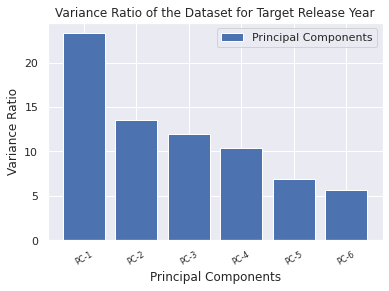

In [ ]:
# Variance Ratio
n=pca3.explained_variance_ratio_

plt.bar([1,2,3,4,5,6],list(n*100),label='Principal Components',color='b')
plt.legend()
plt.xlabel('Principal Components')
plt.xticks([1,2,3,4,5,6],['PC-1','PC-2','PC-3','PC-4','PC-5', 'PC-6'], fontsize=8, rotation=30)
plt.ylabel('Variance Ratio')
plt.title('Variance Ratio of the Dataset for Target Release Year')
plt.show()

In [ ]:
print(n[0] + n[1])

0.3686785417610477


PC-1 and PC 2 can explain  *37* % of the variance in the data

#### Visualization in 2D

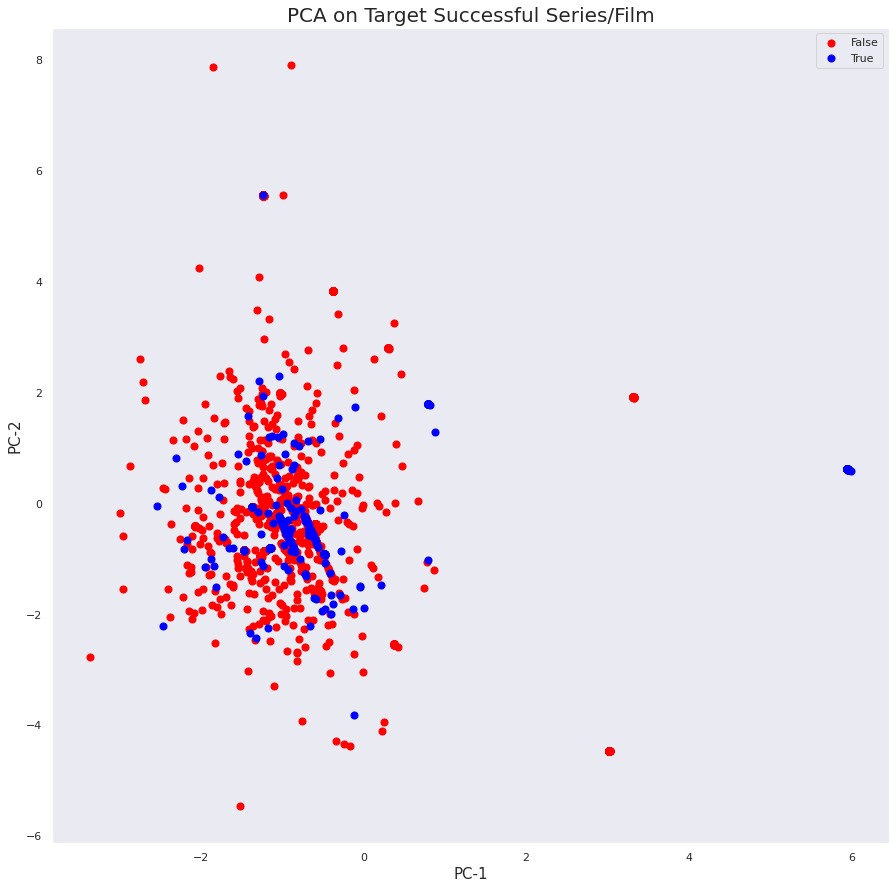

In [ ]:
## Plot PC-1 and PC-2 in a two-dimensional space:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x3)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC-1', 'PC-2'])
# Adding lables
finalDf = pd.concat([principalDf, df_pca3['has_successful_movie_or_serie']], axis = 1)
# Plotting pc1 & pc2
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC-1', fontsize = 15)
ax.set_ylabel('PC-2', fontsize = 15)
ax.set_title('PCA on Target Successful Series/Film', fontsize = 20)
targets = target
colors = ["red", "blue"]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['has_successful_movie_or_serie'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC-1']
               , finalDf.loc[indicesToKeep, 'PC-2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show() # FOR SHOWING THE PLOT

In [ ]:
#Reload if necessary

select_query_distinct = """ 
SELECT distinct has_successful_movie_or_serie FROM has_same_genre ORDER BY has_successful_movie_or_serie
"""
cursor, conn = open_connection()
df_movie_serie = pd.read_sql_query(select_query_distinct, conn)
close_connection(conn)

target = df_movie_serie["has_successful_movie_or_serie"].values.tolist()
print(target)

Connecting to the PostgreSQL database...
Connection successful
Connection closed
[False, True]


# Data Analysis

## Data Analysis - Sources 

### Source: Developer

In [ ]:
## Daten für Data Analysis: Developer 
select_query = """ 
  SELECT *
  FROM developers
  ORDER BY developer_name;
"""
cursor, conn = open_connection()
df_dev = pd.read_sql_query(select_query, conn)
close_connection(conn)

df_dev.head(5)

Connecting to the PostgreSQL database...
Connection successful
Connection closed


,developer_name,city,administrative_division,country,established_since,notable_games,notes,developer_type,developer_id,developed_games_id
0,07th Expansion,None,None,None,NaN,None,None,None,1738,597.0
1,0 Deer Soft,None,None,None,NaN,None,None,None,1462,943.0
2,0verflow,Tokyo,NaN,Japan,1997.0,School DaysSummer DaysCross Days,Visual Novel brand (both developer and publisher),commercial,1,NaN
3,1047 Games,None,None,None,NaN,None,None,None,1527,2093.0
4,10tons,None,None,None,NaN,None,None,None,1071,2546.0


In [ ]:
df_dev.shape

(2127, 10)

In [ ]:
df_dev.describe()

,established_since,developer_id,developed_games_id
count,727.000000,2127.000000,1492.000000
mean,1997.759285,1064.000000,1374.370643
std,9.948827,614.156332,845.840993
min,1889.000000,1.000000,1.000000
25%,1993.000000,532.500000,719.750000
50%,1999.000000,1064.000000,1337.500000
75%,2004.000000,1595.500000,2029.250000
max,2018.000000,2127.000000,3034.000000


**Interpretation**: 
- There 727 values for the column established since.
- The mean of the column established since is around 1997. It means that in average a game developer studio are established in the industry since 1997. This makes sense because in the 90s the computer industry started growing fastly. 

In [ ]:
df_dev.describe(include=object)

,developer_name,city,administrative_division,country,notable_games,notes,developer_type
count,2127,874,874,874,874,532,874
unique,2127,353,57,50,785,460,2
top,07th Expansion,Tokyo,NaN,United States,NaN,Developer/publisher,commercial
freq,1,86,420,314,85,20,727


**Interpretation**:
- There are  2127 unique Developer Studios in the data basis
- Tokyo is the most mentioned city with a count of 353 . For the countries this is the United States with an amount of 314 times.
- The most mentioned developer type is the commercial developer type with a number of 727.

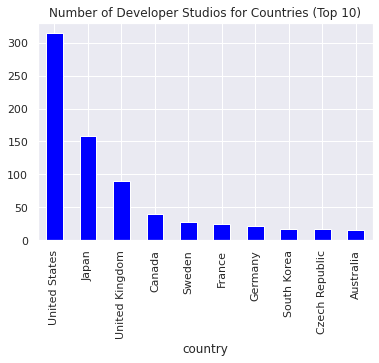

In [ ]:
# Bar Chart Countries

df_dev_country = df_dev.value_counts("country", sort = True, dropna = True)[:10]
df_dev_country.plot.bar(x="country", y="number", color= "blue", title="Number of Developer Studios for Countries (Top 10)")
plt.show(block=True)

USA is the top country for developers, followed by Japan and UK. 

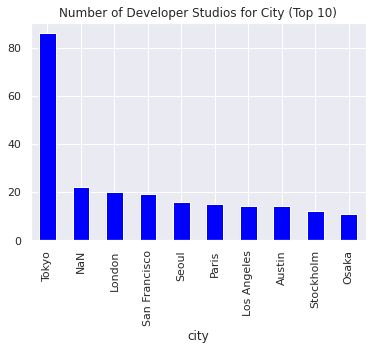

In [ ]:
# Bar Chart Cities

df_dev_city = df_dev.value_counts("city", sort = True, dropna = True)[:10]
df_dev_city.plot.bar(x="city", y="number", color= "blue", title="Number of Developer Studios for City (Top 10)")
plt.show(block=True)

Toky is the top city for developers, followed by London and San Francisco. 

### Source: Game Achievements

In [ ]:
## Daten für Data Analysis: Game Achievements 
select_query = """ 
  SELECT *
  FROM game_achievements
  ORDER BY steam_app_id;
"""
cursor, conn = open_connection()
df_ga = pd.read_sql_query(select_query, conn)
close_connection(conn)

df_ga.head(5)

Connecting to the PostgreSQL database...
Connection successful
Connection closed


,title,owners_estimation_gameachievements,steam_app_id
0,Half-Life 2,8877286.0,220.0
1,Counter-Strike: Source,15001876.0,240.0
2,Day of Defeat: Source,4419447.0,300.0
3,Half-Life 2: Episode One,3917529.0,380.0
4,Portal,9971481.0,400.0


In [ ]:
df_ga.shape

(8957, 3)

In [ ]:
df_ga.describe()

,owners_estimation_gameachievements,steam_app_id
count,8.956000e+03,8956.000000
mean,1.982411e+05,447787.206342
std,1.202027e+06,179610.073251
min,1.000000e+03,220.000000
25%,3.915750e+03,322965.000000
50%,1.409200e+04,432310.000000
75%,6.839475e+04,576662.500000
max,5.019135e+07,878270.000000


In [ ]:
1.982411 * 10 **5

198241.1

**Interpretation:** 
- In average a game released on steam has 198.241 owners of the game. 
- The median has a value 14.092 which is much lower than the value at average. It means that  half of the measured values are below or equal to this value
the large difference to the average can be explained by the fact that strong outliers influence the average but leave the median unaffected.

### Source: Steamstore

In [ ]:
## Daten für Data Analysis: Steamstore
select_query = """ 
  SELECT *
  FROM steamstore
  ORDER BY steam_app_id;
"""
cursor, conn = open_connection()
df_s1 = pd.read_sql_query(select_query, conn)
close_connection(conn)

df_s1.head(5)

Connecting to the PostgreSQL database...
Connection successful
Connection closed


,link,title,genres,developers,publishers,franchise,total_ratings,positivity,link_gamestat,revenue_gamestats,...,franchise2,franchise3,boxleiter_number,revenue_boxleiter,steam_app_id,action,adventure,action_and_adventure,has_another_developer,has_publisher
0,https://store.steampowered.com/app/10/CounterS...,Counter-Strike,Action,Valve,NaN,NaN,124664.0,96.0,https://games-stats.com/steam/game/counter-str...,24000000.0,...,NaN,NaN,50,6233200.0,10,True,False,False,False,False
1,https://store.steampowered.com/app/130/HalfLif...,Half-Life: Blue Shift,Action,Gearbox Software,Valve,Half-Life,9598.0,91.0,https://games-stats.com/steam/game/half-life-b...,920000.0,...,NaN,NaN,50,479900.0,130,True,False,False,False,True
2,https://store.steampowered.com/app/240/Counter...,Counter-Strike: Source,Action,Valve,NaN,NaN,93976.0,96.0,https://games-stats.com/steam/game/counter-str...,18000000.0,...,NaN,NaN,50,4698800.0,240,True,False,False,False,False
3,https://store.steampowered.com/app/400/Portal/...,Portal,Action,Valve,NaN,NaN,94194.0,98.0,https://games-stats.com/steam/game/portal/,18000000.0,...,NaN,NaN,50,4709700.0,400,True,False,False,False,False
4,https://store.steampowered.com/app/420/HalfLif...,Half-Life 2: Episode Two,Action,Valve,Valve,Half-Life,24198.0,97.0,https://games-stats.com/steam/game/half-life-2...,3700000.0,...,NaN,NaN,50,1209900.0,420,True,False,False,False,True


In [ ]:
df_s1.shape

(2155, 30)

In [ ]:
df_s1.describe()




,total_ratings,positivity,revenue_gamestats,boxleiter_number,revenue_boxleiter,steam_app_id
count,1.854000e+03,1854.000000,1.070000e+03,2155.0,1.854000e+03,2.155000e+03
mean,2.040141e+04,80.477346,8.979001e+06,50.0,1.020070e+06,1.021075e+06
std,1.777830e+05,15.431630,2.924320e+07,0.0,8.889149e+06,5.834681e+05
min,1.000000e+01,10.000000,0.000000e+00,50.0,5.000000e+02,1.000000e+01
25%,1.140000e+02,74.000000,4.500000e+04,50.0,5.700000e+03,5.120335e+05
50%,6.850000e+02,84.500000,5.800000e+05,50.0,3.425000e+04,1.032430e+06
75%,5.864250e+03,92.000000,4.275000e+06,50.0,2.932125e+05,1.478070e+06
max,6.705954e+06,100.000000,4.200000e+08,50.0,3.352977e+08,2.171720e+06


**Interpretation:**
- *Mean* of Positivity is 80,47 % which is close to the median of 84,5% --> no strong outliers for this column
- *Mean* of Total Ratings and Boxleiter Revenue both have large difference to the median which can be explained that they are high outliers for both attributes. 
- *Mean* values and *standard deviations * from Boxleiter Revenue to Gamestats Revenue have large deviations from each other. This indicates that a method other than the box ladder was used for the game stats.

- *Minimum* of Positivity is 10 %. This must be a very bad game.
- *Minumum* of Total Ratings are 10 reviews. Minimum of Revenue Boxleiter is 500 $.




In [ ]:
df_s1.describe(include=object)

,link,title,genres,developers,publishers,franchise,link_gamestat,genre1,genre2,genre3,developer1,developer2,developer3,publisher1,publisher2,publisher3,franchise1,franchise2,franchise3
count,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155
unique,2155,2155,302,1082,313,409,2155,15,14,13,1043,95,19,288,41,10,379,71,12
top,https://store.steampowered.com/app/10/CounterS...,Counter-Strike,Action,NaN,NaN,NaN,https://games-stats.com/steam/game/counter-str...,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,134,153,972,944,1,833,492,1129,153,1939,2070,972,2026,2097,944,1980,2133


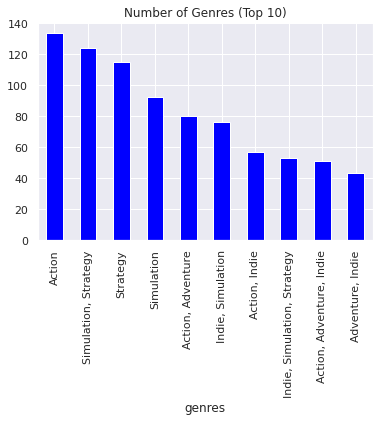

In [ ]:
# Bar Chart Genres

df_s1_genre = df_s1.value_counts("genres", sort = True, dropna = True)[:10]
df_s1_genre.plot.bar(x="genres", y="number", color= "blue", title="Number of Genres (Top 10)")
plt.show(block=True)

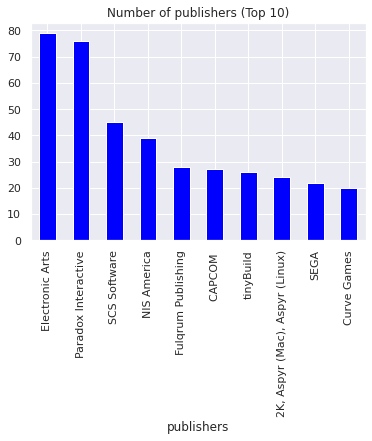

In [ ]:
# Bar Chart Publishers

df_s1_pub = df_s1.value_counts("publishers", sort = True, dropna = True)[1:11]
df_s1_pub.plot.bar(x="publishers", y="number", color= "blue", title="Number of publishers (Top 10)")
plt.show(block=True)

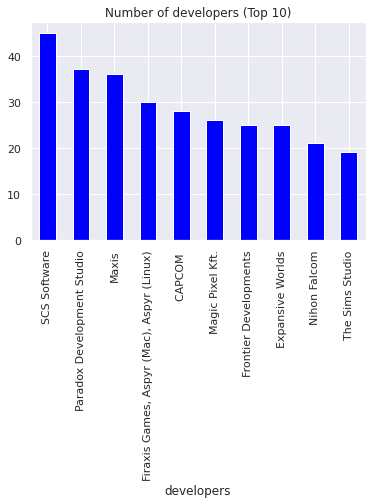

In [ ]:
# Bar Chart Developers

df_s1_dev = df_s1.value_counts("developers", sort = True, dropna = True)[1:11]
df_s1_dev.plot.bar(x="developers", y="number", color= "blue", title="Number of developers (Top 10)")
plt.show(block=True)

### Source: Steam

In [ ]:
## Daten für Data Analysis: Steam
select_query = """ 
  SELECT *
  FROM steam
  ORDER BY steam_app_id;
"""
cursor, conn = open_connection()
df_s2 = pd.read_sql_query(select_query, conn)
close_connection(conn)

df_s2.head(5)

Connecting to the PostgreSQL database...
Connection successful
Connection closed


,game_type,title,steam_app_id,required_age,is_free,detailed_description,languages,developers,publishers,dlc_steam_app_id,...,tag3,genre1,genre2,genre3,action,adventure,action_and_adventure,has_dlc,has_another_developer,has_publisher
0,game,Day of Defeat,30,0,False,Enlist in an intense brand of Axis vs. Allied ...,"English, French, German, Italian, Spanish - Spain",Valve,Valve,NaN,...,NaN,Action,NaN,NaN,True,False,False,False,False,True
1,game,Half-Life: Opposing Force,50,0,False,Return to the Black Mesa Research Facility as ...,"English, French, German, Korean",Gearbox Software,Valve,NaN,...,Valve Anti-Cheat enabled,Action,NaN,NaN,True,False,False,False,False,True
2,game,Ricochet,60,0,False,A futuristic action game that challenges your ...,"English, French, German, Italian, Spanish - Sp...",Valve,Valve,NaN,...,Online PvP,Action,NaN,NaN,True,False,False,False,False,True
3,game,Half-Life,70,0,False,Named Game of the Year by over 50 publications...,"English , French , German , Italian , Spanish ...",Valve,Valve,323130,...,PvP,Action,NaN,NaN,True,False,False,True,False,True
4,game,Counter-Strike: Condition Zero,80,0,False,"With its extensive Tour of Duty campaign, a ne...","English, French, German, Italian, Spanish - Sp...",Valve,Valve,NaN,...,Valve Anti-Cheat enabled,Action,NaN,NaN,True,False,False,False,False,True


In [ ]:
df_s2.shape

(981, 38)

In [ ]:
df_s2.describe()

,steam_app_id,required_age,initial_price,current_price,discount,metacritic_score,total_nr_recommendations,boxleiter_number
count,9.810000e+02,981.000000,696.000000,696.000000,696.000000,573.000000,8.900000e+02,981.0
mean,4.429977e+05,4.399592,396.883060,365.804353,4.889368,79.970332,4.949757e+04,50.0
std,3.992374e+05,7.404588,3415.030764,3141.893229,17.758592,8.424956,1.573303e+05,0.0
min,3.000000e+01,0.000000,0.990000,0.510000,0.000000,43.000000,1.030000e+02,50.0
25%,2.090800e+05,0.000000,14.990000,9.990000,0.000000,75.000000,6.100750e+03,50.0
50%,3.160100e+05,0.000000,19.990000,19.990000,0.000000,81.000000,1.778400e+04,50.0
75%,6.061500e+05,13.000000,29.990000,29.990000,0.000000,86.000000,4.555475e+04,50.0
max,1.938090e+06,18.000000,49800.000000,49800.000000,100.000000,97.000000,3.534231e+06,50.0


**Interpretation:** 
- For the median in the required age the most games have a required age of 0 years (no age limit). The highest value is the age of 18 years.
- Initial price. The max values and mean value indicates that there is a wrong value with 49800 which should be corrected. Half of the measured values for the initial price are 19,99 $ games.
- The Current Price and the initial price doesnt show any strong deviations to each other. They are nearly equal.
- The median of the metacritic score of 81 % is relatively close to the value of the positivity score which has be seen in the steamstore analysis of 84.5 %.


In [ ]:
df_s2.describe(include=object)

,game_type,title,detailed_description,languages,developers,publishers,dlc_steam_app_id,tags,genres,pc_requirements_minimum,...,developer3,publisher1,publisher2,publisher3,tag1,tag2,tag3,genre1,genre2,genre3
count,981,981,981,981,981,981,981,981,981,981,...,981,981,981,981,981,981,981,981,981,981
unique,1,981,981,758,686,483,546,696,250,963,...,24,444,39,9,14,31,41,26,26,22
top,game,Day of Defeat,Enlist in an intense brand of Axis vs. Allied ...,English,Valve,Electronic Arts,NaN,Single-player,Action,"Minimum: 500 mhz processor, 96mb ram, 16mb vid...",...,NaN,SEGA,NaN,NaN,Single-player,Multi-player,PvP,Action,Adventure,NaN
freq,981,1,1,66,26,35,436,31,139,6,...,933,41,894,948,786,441,218,621,255,534


In [ ]:
df_s2.columns

Index(['game_type', 'title', 'steam_app_id', 'required_age', 'is_free',
       'detailed_description', 'languages', 'developers', 'publishers',
       'dlc_steam_app_id', 'tags', 'genres', 'pc_requirements_minimum',
       'initial_price', 'current_price', 'discount', 'metacritic_score',
       'total_nr_recommendations', 'release_date', 'boxleiter_number',
       'developer1', 'developer2', 'developer3', 'publisher1', 'publisher2',
       'publisher3', 'tag1', 'tag2', 'tag3', 'genre1', 'genre2', 'genre3',
       'action', 'adventure', 'action_and_adventure', 'has_dlc',
       'has_another_developer', 'has_publisher'],
      dtype='object')

In [ ]:
# Bar Chart Languages - Top 10 Languages 

df_s2_lang = df_s2.value_counts("languages", sort = True, dropna = True)[1:11]
pprint(df_s2_lang)

languages
English  languages with full audio support                                                                                                                                               60
English, French, German, Italian, Spanish - Spain                                                                                                                                        21
English , French , German , Italian , Spanish - Spain  languages with full audio support                                                                                                  9
English , French , German  languages with full audio support                                                                                                                              7
English, French, German                                                                                                                                                                   7
English, Russian                                  

In [ ]:
# Bar Chart PC Requirements Minimum

df_s2_pc = df_s2.value_counts("pc_requirements_minimum", sort = True, dropna = True)[1:11]
pprint(df_s2_pc)

pc_requirements_minimum
Minimum: 1.7 GHz Processor, 512MB RAM, DirectX&reg; 8.1 level Graphics Card (Requires support for SSE), Windows&reg; 7 (32/64-bit)/Vista/XP, Mouse, Keyboard, Internet ConnectionRecommended: Pentium 4 processor (3.0GHz, or better), 1GB RAM, DirectX&reg; 9 level Graphics Card, Windows&reg; 7 (32/64-bit)/Vista/XP, Mouse, Keyboard, Internet Connection                                                                                                                                                                                                                           5
Minimum:OS: Windows 7 64-bit, Windows 8.1 64-bit or Windows 10 64-bitProcessor: Intel® Core™ i3-530 @ 2.93 GHz / AMD FX-4100 @ 3.60 GHz or betterMemory: 4 GB RAMGraphics: NVIDIA® GeForce® GT 450 1GB / AMD® Radeon™ HD 7770 1GB or betterDirectX: Version 11Storage: 80 GB available spaceSound Card: DirectX 9.0x compatible Dual-Analog Gamepad: RecommendedAdditional Notes: Initial installation requires one-ti

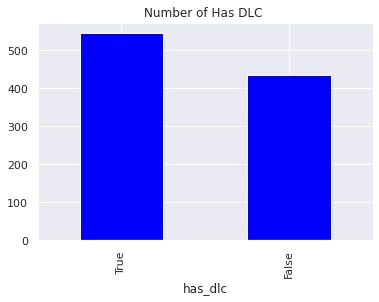

In [ ]:
# Bar Chart Has DLC

df_s2_dlc = df_s2.value_counts("has_dlc", sort = True, dropna = True)
df_s2_dlc.plot.bar(x="DLC", y="number", color= "blue", title="Number of Has DLC ")
plt.show(block=True)

### Source: Steamspy

In [ ]:
## Daten für Data Analysis: Steam
select_query = """ 
  SELECT *
  FROM steamspy
  ORDER BY steam_app_id;
"""
cursor, conn = open_connection()
df_s3 = pd.read_sql_query(select_query, conn)
close_connection(conn)

df_s3.head(5)

Connecting to the PostgreSQL database...
Connection successful
Connection closed


,steam_app_id,title,developers,publishers,score_rank,positive,negative,userscore,owners_estimation_steamspy,average_playtime_forever,...,developer2,developer3,publisher1,publisher2,publisher3,action,adventure,action_and_adventure,has_another_developer,has_publisher
0,10,Counter-Strike,Valve,Valve,NaN,201123,5197,0,"10,000,000 .. 20,000,000",12958,...,NaN,NaN,Valve,NaN,NaN,True,False,False,False,True
1,20,Team Fortress Classic,Valve,Valve,NaN,5828,933,0,"5,000,000 .. 10,000,000",125,...,NaN,NaN,Valve,NaN,NaN,True,False,False,False,True
2,30,Day of Defeat,Valve,Valve,NaN,5249,569,0,"5,000,000 .. 10,000,000",1809,...,NaN,NaN,Valve,NaN,NaN,True,False,False,False,True
3,40,Deathmatch Classic,Valve,Valve,NaN,1962,436,0,"5,000,000 .. 10,000,000",244,...,NaN,NaN,Valve,NaN,NaN,True,False,False,False,True
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,14871,756,0,"5,000,000 .. 10,000,000",270,...,NaN,NaN,Valve,NaN,NaN,True,False,False,False,True


In [ ]:
df_s3.shape

(996, 34)

In [ ]:
df_s3.describe()

,steam_app_id,score_rank,positive,negative,userscore,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,current_price,initial_price,discount,ccu,boxleiter_number
count,9.960000e+02,0.0,9.960000e+02,996.000000,996.0,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.0
mean,4.463211e+05,NaN,6.306338e+04,9483.186747,0.0,1995.376506,240.839357,616.260040,258.287149,16.125673,16.784287,3.026104,6206.756024,50.0
std,4.021033e+05,NaN,2.226784e+05,41990.117869,0.0,3443.617540,705.862757,1188.821753,809.484175,16.251406,16.333707,14.118071,42154.257422,0.0
min,1.000000e+01,NaN,0.000000e+00,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.0
25%,2.089125e+05,NaN,1.038400e+04,1503.000000,0.0,375.750000,0.000000,134.000000,0.000000,0.000000,0.000000,0.000000,78.750000,50.0
50%,3.166850e+05,NaN,2.296750e+04,2993.000000,0.0,898.500000,42.000000,286.000000,45.000000,14.990000,14.990000,0.000000,384.000000,50.0
75%,6.141475e+05,NaN,5.399675e+04,6612.000000,0.0,2151.750000,256.250000,664.000000,248.250000,19.990000,24.990000,0.000000,1775.250000,50.0
max,1.938090e+06,NaN,5.936716e+06,908128.000000,0.0,39712.000000,15351.000000,15850.000000,15351.000000,99.990000,99.990000,90.000000,848809.000000,50.0


**Interpretation:** 
- In the Steamspy source current price and initial price are also very close to each other
- Mean of average_playtime_forever and average_playtime_2weeks are far away from each other. The same applies for the median_playtime_forever to median_playtime_2weeks
- Mean of average_playtime_forever to mean of mean_playtime_forever to each other are also far away from each other.
- The columns positive and negative doesnt fit to the observations metacritic score and positiviy 
- The columns userscore and score_ranke are useless attributes

In [ ]:
df_s3.describe(include=object)

,title,developers,publishers,owners_estimation_steamspy,languages,genres,genre1,genre2,genre3,developer1,developer2,developer3,publisher1,publisher2,publisher3
count,996,996,996,996,996,996,996,996,996,996,996,996,996,996,996
unique,996,692,488,9,696,234,16,16,13,633,82,25,450,37,9
top,Counter-Strike,Valve,Electronic Arts,"1,000,000 .. 2,000,000",English,Action,Action,Action,NaN,Valve,NaN,NaN,SEGA,NaN,NaN
freq,1,29,37,479,125,148,655,655,549,30,868,946,43,907,962


**Interpretation:**
- English is the most mentioned language
- For the genres (genre 1 and genre2) Action is the most dominant genre
- Electronic Arts is the most mentioned publishers whereas Valve is the most mentioned develoepr in the dataset. 

### Source: Games (Combined Data)

In [ ]:
## Game Achievements vs Boxleiter Revenue
select_query = """ 
  SELECT Steam_app_ID,
  title,
  revenue_gameachievements,
  revenue_boxleiter
  FROM games
  WHERE revenue_gameachievements is not null
  ORDER BY revenue_gameachievements desc
  ;
"""
cursor, conn = open_connection()
df = pd.read_sql_query(select_query, conn)
close_connection(conn)

df.head(5)

Connecting to the PostgreSQL database...
Connection successful
Connection closed


,steam_app_id,title,revenue_gameachievements,revenue_boxleiter
0,8930,Sid Meier's Civilization V,380917920.0,1.712684e+08
1,271590,Grand Theft Auto V,377871620.0,1.951140e+09
2,252490,Rust,365798140.0,1.366916e+09
3,72850,The Elder Scrolls V: Skyrim,264577410.0,1.796861e+08
4,49520,Borderlands 2,224266530.0,1.822868e+08


In [ ]:
df.describe()

,steam_app_id,revenue_gameachievements,revenue_boxleiter
count,434.000000,4.340000e+02,4.040000e+02
mean,283433.225806,3.063382e+07,5.035912e+07
std,169393.474679,5.003209e+07,1.516825e+08
min,220.000000,0.000000e+00,0.000000e+00
25%,208102.500000,2.425792e+05,1.537912e+06
50%,264960.000000,1.512645e+07,1.148276e+07
75%,380837.500000,3.536237e+07,3.595676e+07
max,730310.000000,3.809179e+08,1.951140e+09


**Interpretation**:
- Mean from revenue achievements and revenue boxleiter are relatively close to each other. 
- Median are more far way which indicates strong outlier influence in the boxleiter method.

In [ ]:
## Daten für Histogram Check um im DWH Total_Nr_Recommendations und Total_Ratings in eine Spalte zu bringen
select_query = """ 
  SELECT s1.Steam_app_ID,
  s1.total_ratings,
  s2.total_nr_recommendations
  FROM steamstore s1
  FULL OUTER JOIN steam s2 on s1.Steam_app_ID = s2.Steam_app_ID
  ORDER BY Steam_app_ID;
"""
cursor, conn = open_connection()
df = pd.read_sql_query(select_query, conn)
close_connection(conn)

df.head(5)

Connecting to the PostgreSQL database...
Connection successful
Connection closed


,steam_app_id,total_ratings,total_nr_recommendations
0,10.0,124664.0,NaN
1,130.0,9598.0,9640.0
2,240.0,93976.0,94213.0
3,400.0,94194.0,94566.0
4,420.0,24198.0,24293.0


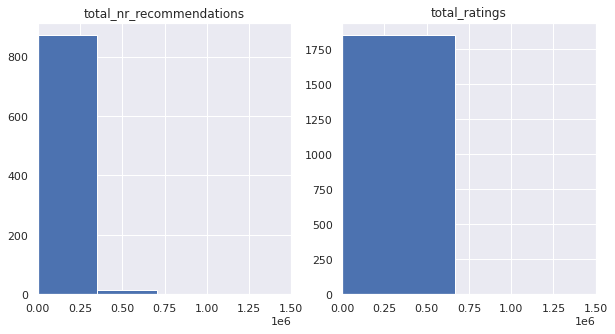

In [ ]:
# Histogramm für Total_Nr_Recommendations

total_nr_recommendations = df["total_nr_recommendations"]
total_ratings = df["total_ratings"]

# Creating histogram
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))

ax1.hist(total_nr_recommendations)
ax1.set_title("total_nr_recommendations")
ax1.set_xlim([0,1500000])

ax2.hist(total_ratings)
ax2.set_title("total_ratings")
ax2.set_xlim([0,1500000])

# Show plot
plt.show()

**Interpretation**: Data show a similar structure, whereby total_ratings is clearly more pronounced. Nevertheless, total_nr_recommendations can be combined to impute the missing values in total ratings.

In [ ]:
## Daten für Histogram Check um im DWH Positivity und Metacritic Score in eine Spalte zu bringen
select_query = """ 
  SELECT Steam_app_ID,
  metacritic_score,
  positivity
  FROM games
  ORDER BY Steam_app_ID;
"""
cursor, conn = open_connection()
df = pd.read_sql_query(select_query, conn)
close_connection(conn)

df.head(5)

Connecting to the PostgreSQL database...
Connection successful
Connection closed


,steam_app_id,metacritic_score,positivity
0,10,NaN,96.0
1,20,NaN,NaN
2,30,79.0,NaN
3,40,NaN,NaN
4,50,NaN,NaN


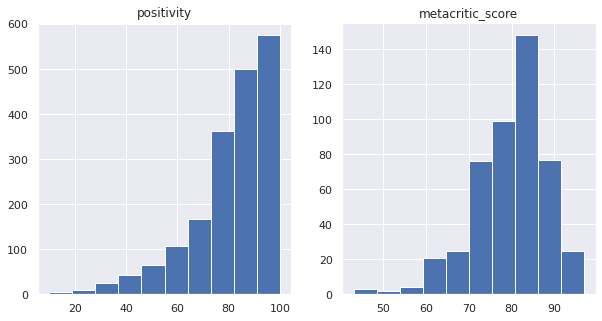

In [ ]:
# Histogramm 

pos = df["positivity"]
metacritic = df["metacritic_score"]

# Creating histogram
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))

ax1.hist(pos)
ax1.set_title("positivity")

ax2.hist(metacritic)
ax2.set_title("metacritic_score")

# Show plot
plt.show()

### Source: The Movie Database

In [ ]:
## Daten für Data Analysis: Movies 
select_query = """ 
  SELECT *
  FROM movies
"""
cursor, conn = open_connection()
df_movie = pd.read_sql_query(select_query, conn)
close_connection(conn)

df_movie.head(5)

Connecting to the PostgreSQL database...
Connection successful
Connection closed


,adult,backdrop_path,id,original_language,original_title,overview,popularity,poster_path,release_date,title,...,vote_count,genre_1,genre_2,genre_name1,genre_name2,genre_accumulated,action,adventure,action_and_adventure,release_year
0,false,/rl7Jw8PjhSIjArOlDNv0JQPL1ZV.jpg,851644.0,ko,20세기 소녀,Yeon-du asks her best friend Bora to collect a...,197.396,/od22ftNnyag0TTxcnJhlsu3aLoU.jpg,2022-10-01,20th Century Girl,...,286.0,10749.0,18.0,Romance,Drama,"Romance,Drama",False,False,False,2022
1,false,/tmU7GeKVybMWFButWEGl2M4GeiP.jpg,238.0,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",90.122,/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,1972-03-01,The Godfather,...,16985.0,18.0,80.0,Drama,Crime,"Drama,Crime",False,False,False,1972
2,false,/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg,278.0,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,80.871,/hBcY0fE9pfXzvVaY4GKarweriG2.jpg,1994-09-01,The Shawshank Redemption,...,22740.0,18.0,80.0,Drama,Crime,"Drama,Crime",False,False,False,1994
3,false,/kGzFbGhp99zva6oZODW5atUtnqi.jpg,240.0,en,The Godfather Part II,In the continuing saga of the Corleone crime f...,51.050,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg,1974-12-01,The Godfather Part II,...,10291.0,18.0,80.0,Drama,Crime,"Drama,Crime",False,False,False,1974
4,false,/bxSBOAD8AuMHYMdW3jso9npAkgt.jpg,667257.0,es,Cosas imposibles,"Matilde is a woman who, after the death of her...",37.160,/t2Ew8NZ8Ci2kqmoecZUNQUFDJnQ.jpg,2021-06-01,Impossible Things,...,299.0,10751.0,18.0,Family,Drama,"Family,Drama",False,False,False,2021


In [ ]:
df_movie.shape

(9998, 22)

In [ ]:
df_movie.isna().sum()

adult                   0
backdrop_path           0
id                      0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
release_date            0
title                   0
video                   0
vote_average            0
vote_count              0
genre_1                 0
genre_2                 0
genre_name1             0
genre_name2             0
genre_accumulated       0
action                  0
adventure               0
action_and_adventure    0
release_year            0
dtype: int64

In [ ]:
df_movie.describe()

,id,popularity,vote_average,vote_count,genre_1,genre_2
count,9.998000e+03,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,1.689875e+05,25.026721,6.681496,1592.143829,966.937688,1776.239448
std,2.212873e+05,126.270772,0.705614,2724.053067,2967.234496,3885.905165
min,3.000000e+00,0.600000,5.300000,200.000000,12.000000,0.000000
25%,1.016650e+04,10.883750,6.100000,319.000000,18.000000,14.000000
50%,3.162500e+04,15.204000,6.700000,598.500000,28.000000,28.000000
75%,3.277075e+05,23.038750,7.200000,1508.000000,35.000000,53.000000
max,1.024530e+06,10405.742000,8.700000,32676.000000,10770.000000,10770.000000


**Interpretation:** The mean vote average of all the movies contained in the data lake is 6.68. The amount of votes a movie has received is on average 1592.

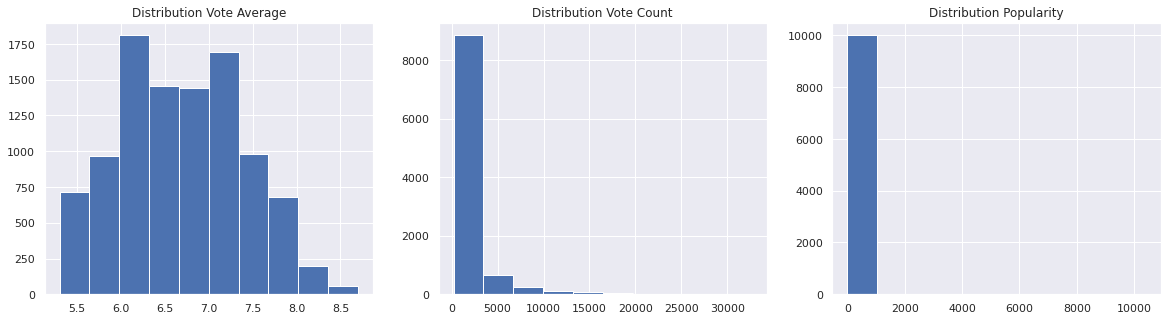

In [ ]:
# Plot the distribution
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,5))
ax1.hist(df_movie["vote_average"])
ax1.set_title("Distribution Vote Average")
ax2.hist(df_movie["vote_count"])
ax2.set_title("Distribution Vote Count")
ax3.hist(df_movie["popularity"])
ax3.set_title("Distribution Popularity")
plt.show();

**Interpretation:** The distribution for vote average seems to resemble a normal distribution, where most of the movies have a vote average of 6 - 6.25 and 7 - 7.25. The distribution for vote count and popularity seem to be binomial distributions which most likely hold several outliers. The vote count des not seem to suffer from outliers, whereas the popularity score is having two major outliers causing a very skewed distribution.

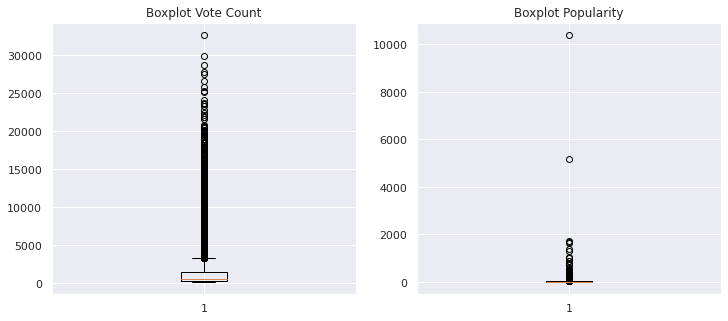

In [ ]:
# Plot the distribution
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12,5))
ax1.boxplot(df_movie["vote_count"])
ax1.set_title("Boxplot Vote Count")
ax2.boxplot(df_movie["popularity"])
ax2.set_title("Boxplot Popularity")
plt.show();

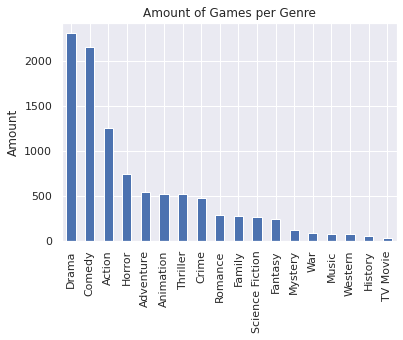

In [ ]:
amount_genre = df_movie["genre_name1"].value_counts()
amount_genre.plot(kind = "bar")
plt.title("Amount of Games per Genre")
plt.ylabel("Amount")
plt.show();

**Interpretation:** The genre Drama and Comedy are making up most of the movies in the database. Action is appearing on third position.

In [ ]:
df_movie.dtypes

adult                    object
backdrop_path            object
id                      float64
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
release_date             object
title                    object
video                    object
vote_average            float64
vote_count              float64
genre_1                 float64
genre_2                 float64
genre_name1              object
genre_name2              object
genre_accumulated        object
action                     bool
adventure                  bool
action_and_adventure       bool
release_year             object
dtype: object

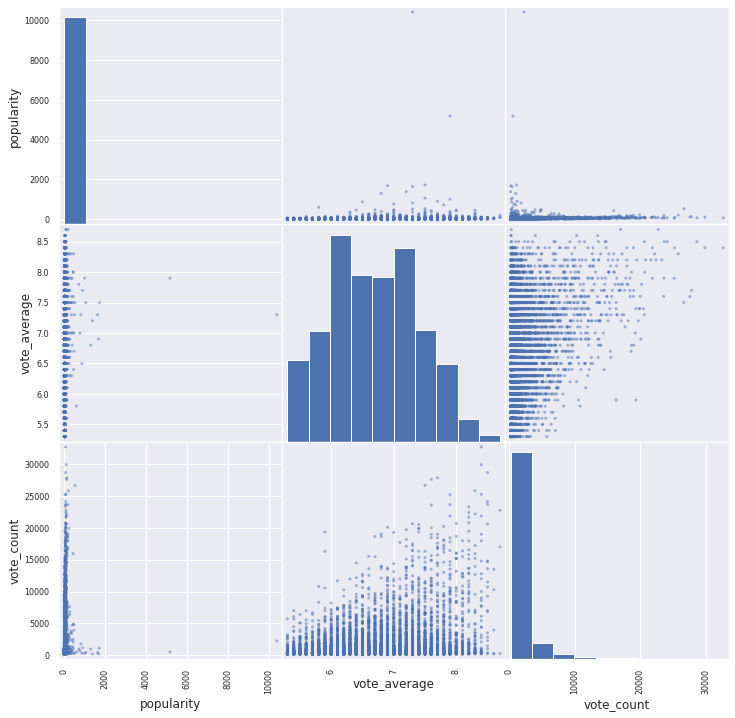

In [ ]:
column = [1,2,3]
pd.plotting.scatter_matrix(
    df_movie.select_dtypes(include='number').iloc[:,column],
    figsize=(12,12)
);

In [ ]:
## Daten für Data Analysis: Series 
select_query = """ 
  SELECT *
  FROM series
"""
cursor, conn = open_connection()
df_series = pd.read_sql_query(select_query, conn)
close_connection(conn)

df_series.head(5)

Connecting to the PostgreSQL database...
Connection successful
Connection closed


,backdrop_path,release_date,id,title,original_language,original_title,overview,popularity,poster_path,vote_average,vote_count,genre_1,genre_2,genre_name1,genre_name2,genre_accumulated,action_and_adventure,release_year
0,/7q448EVOnuE3gVAx24krzO7SNXM.jpg,2021-09-01,130392.0,The D'Amelio Show,en,The D'Amelio Show,From relative obscurity and a seemingly normal...,29.210,/phv2Jc4H8cvRzvTKb9X1uKMboTu.jpg,9.0,3145.0,10764.0,0.0,Reality,NaN,Reality,False,2021
1,/84XPpjGvxNyExjSuLQe0SzioErt.jpg,2008-01-01,1396.0,Breaking Bad,en,Breaking Bad,"When Walter White, a New Mexico chemistry teac...",332.544,/ggFHVNu6YYI5L9pCfOacjizRGt.jpg,8.8,10447.0,18.0,0.0,Drama,NaN,Drama,False,2008
2,/iHSwvRVsRyxpX7FE7GbviaDvgGZ.jpg,2022-11-01,119051.0,Wednesday,en,Wednesday,"Wednesday Addams is sent to Nevermore Academy,...",3834.212,/jeGtaMwGxPmQN5xM4ClnwPQcNQz.jpg,8.8,1196.0,10765.0,9648.0,Sci-Fi & Fantasy,Mystery,"Sci-Fi & Fantasy,Mystery",False,2022
3,/rkB4LyZHo1NHXFEDHl9vSD9r1lI.jpg,2021-11-01,94605.0,Arcane,en,Arcane,Amid the stark discord of twin cities Piltover...,98.105,/fqldf2t8ztc9aiwn3k6mlX3tvRT.jpg,8.7,2708.0,16.0,10765.0,Animation,Sci-Fi & Fantasy,"Animation,Sci-Fi & Fantasy",False,2021
4,/uGy4DCmM33I7l86W7iCskNkvmLD.jpg,2013-12-01,60625.0,Rick and Morty,en,Rick and Morty,Rick is a mentally-unbalanced but scientifical...,891.191,/cvhNj9eoRBe5SxjCbQTkh05UP5K.jpg,8.7,7451.0,16.0,35.0,Animation,Comedy,"Animation,Comedy",False,2013


In [ ]:
df_series.shape

(2371, 18)

In [ ]:
df_series.isna().sum()

backdrop_path           0
release_date            0
id                      0
title                   0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
vote_average            0
vote_count              0
genre_1                 0
genre_2                 0
genre_name1             0
genre_name2             0
genre_accumulated       0
action_and_adventure    0
release_year            0
dtype: int64

In [ ]:
df_series.describe()

,id,popularity,vote_average,vote_count,genre_1,genre_2
count,2371.000000,2371.000000,2371.000000,2371.000000,2371.000000,2371.000000
mean,56465.175875,61.239150,7.819275,651.566849,2945.217630,3240.569802
std,39895.290332,120.832982,0.468794,1295.611491,4747.424167,4859.553688
min,34.000000,1.119000,6.900000,100.000000,16.000000,0.000000
25%,13998.000000,21.399500,7.500000,159.000000,18.000000,16.000000
50%,62649.000000,35.452000,7.800000,278.000000,35.000000,18.000000
75%,86343.000000,65.196500,8.200000,610.000000,10199.500000,9648.000000
max,210232.000000,3834.212000,9.000000,19865.000000,10768.000000,10768.000000


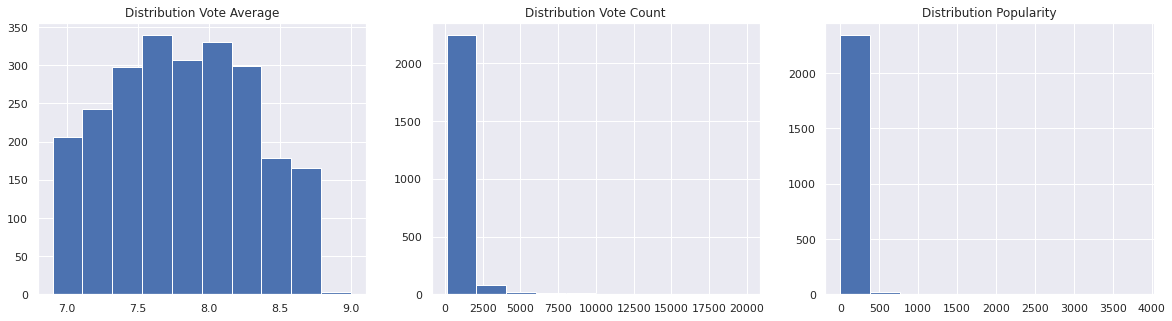

In [ ]:
# Plot the distribution
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,5))
ax1.hist(df_series["vote_average"])
ax1.set_title("Distribution Vote Average")
ax2.hist(df_series["vote_count"])
ax2.set_title("Distribution Vote Count")
ax3.hist(df_series["popularity"])
ax3.set_title("Distribution Popularity")
plt.show();

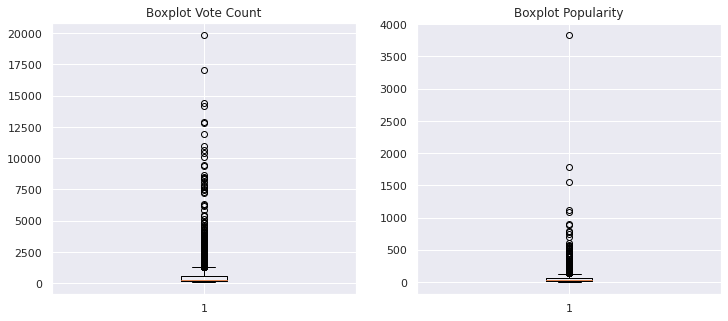

In [ ]:
# Plot the distribution
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12,5))
ax1.boxplot(df_series["vote_count"])
ax1.set_title("Boxplot Vote Count")
ax2.boxplot(df_series["popularity"])
ax2.set_title("Boxplot Popularity")
plt.show();